# Option Strategies and Position Equivalencies

In [1]:
# Import all relevant packages 
import math
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.stats import norm
%matplotlib inline

from IPython.display import HTML

In [2]:
# # used to hide the code afterwards 
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Some lines of code that will help visualize the payoff of strategies 

In [3]:
def call(strike, premium_call):
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of Long Call position: max(S-X,0) where we include the premium here
    
    payoff_long_call = [max(0, (i - strike)) - premium_call for i in price]
    payoff_short_call = [min(0, (strike - i)) + premium_call for i in price]
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    plt.style.use('dark_background')
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=3)
    ax1.plot(price, payoff_short_call, label = 'Short Call',linewidth=3)
    
    # get line at origin
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_title('Long & Short Call Payoff',fontsize = 12, color = 'w')
    ax1.grid(True,linewidth=0.2)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    bbox_props1 = dict(boxstyle="Darrow,pad=0.1", fc="b", ec="b")
    bbox_props2 = dict(boxstyle="Darrow,pad=0.1", fc="g", ec="g")
    bbox_props3 = dict(boxstyle="Darrow,pad=0.1", fc="none", ec="y")
    ax1.text(strike - 3.5, -20, "Out of the Money (OTM)", ha="right", va="center", 
            size=12,
            bbox=bbox_props1)
    ax1.text(strike + 3, -20, "In the Money (ITM)", ha="left", va="center", color="w",
            size=12,
            bbox=bbox_props2)
    ax1.text(strike, -25, "ATM", ha="center", va="top", rotation=90,
            size=12,
            bbox=bbox_props3)
# define distribution 
    x = np.linspace(120,220,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x <=strike, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [4]:
def put(strike, premium_put): 
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of Long Put position: max(X-S,0) where we include the premium here

    # payoff_long_put = [max(0, (strike - i)) - premium for i in price]
    payoff_long_put = [max(0, (strike - i)) - premium_put for i in price]
    payoff_short_put = [min(0, (i - strike)) + premium_put for i in price]

    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    plt.style.use('dark_background')
    ax1.plot(price, payoff_long_put, label = 'Long Put',linewidth=3)
    ax1.plot(price, payoff_short_put, label = 'Short Put',linewidth=3)
    
    # get line at origin
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_title('Long & Short Put Payoff',fontsize = 12, color = 'w')
    ax1.grid(True,linewidth=0.2)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    bbox_props1 = dict(boxstyle="Darrow,pad=0.1", fc="b", ec="b")
    bbox_props2 = dict(boxstyle="Darrow,pad=0.1", fc="g", ec="g")
    bbox_props3 = dict(boxstyle="Darrow,pad=0.1", fc="none", ec="y")
    ax1.text(strike - 3, -20, "In the Money (ITM)", ha="right", va="center", 
            size=12,
            bbox=bbox_props1)
    ax1.text(strike + 3, -20, "Out of the Money (OTM)", ha="left", va="center", color="w",
            size=12,
            bbox=bbox_props2)
    ax1.text(strike, -25, "ATM", ha="center", va="top", rotation=90,
            size=12,
            bbox=bbox_props3)
# define distribution 
    x = np.linspace(120,220,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x >=strike, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [5]:
def synthetic_long_underlying(strike_atm, premium_atm, underlying):
    price = np.arange(110,230,1)
    payoff_long_call = [max(0, (i - strike_atm)) - premium_atm for i in price]
    payoff_short_put = [min(0, (i - strike_atm)) + premium_atm for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_put], axis=0)
    #
    payoff_long_stock = [i - underlying for i in price]
    
    plt.style.use('dark_background')
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)
    plt.plot(price, payoff_short_put, label = 'Short Put',linewidth=1)
    plt.plot(price, payoff_long_stock, label = 'Long Underlying',linewidth =1)
    
    plt.plot(price, payoff, label = 'Synthetic Long', color='r', linewidth=5, linestyle='dashed')
    plt.axhline(linewidth=2, color='b')
    plt.legend(fontsize = 12)
    plt.title('Synthethic Long Asset',fontsize = 12, color = 'w')
    plt.grid(True,linewidth=0.2)
    plt.xlabel('Price of Underlying at Expiry', fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)

In [6]:
def synthetic_short_underlying(strike_atm, premium_atm, underlying):
    price = np.arange(110,230,1)
    payoff_short_call = [min(0, (strike_atm - i)) + premium_atm for i in price]
    payoff_long_put = [max(0, (strike_atm - i)) - premium_atm for i in price]
    payoff = np.sum([payoff_long_put, payoff_short_call], axis=0)
    #
    payoff_short_stock = [-i + underlying for i in price]
    
    plt.style.use('dark_background')
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)
    plt.plot(price, payoff_short_call, label = 'Short Call',linewidth=1)
    plt.plot(price, payoff_short_stock, label = 'Short Underlying',linewidth =1)
    
    plt.plot(price, payoff, label = 'Synthetic Long', color='r', linewidth=5, linestyle='dashed')
    plt.axhline(linewidth=2, color='b')
    plt.legend(fontsize = 12)
    plt.title('Synthethic Long Asset',fontsize = 12, color = 'w')
    plt.grid(True,linewidth=0.2)
    plt.xlabel('Price of Underlying at Expiry', fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)

In [7]:
def synthetic_put(strike_atm, premium_atm, underlying):
    price = np.arange(110,230,1)
    payoff_long_call = [max(0, (i - strike_atm)) - premium_atm for i in price]
    payoff_short_stock = [-i + underlying for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_stock], axis=0)
    #
    
    
    plt.style.use('dark_background')
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)
    plt.plot(price, payoff_short_stock, label = 'Underlying',linewidth =1)
    plt.plot(price, payoff, label = 'Synthetic Put',color='r', linewidth=5, linestyle='dashed')
    
    
    plt.axhline(linewidth=2, color='b')
    plt.legend(fontsize = 12)
    plt.title('Synthethic Long Asset',fontsize = 12, color = 'w')
    plt.grid(True,linewidth=0.2)
    plt.xlabel('Price of Underlying at Expiry', fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)

In [8]:
def synthetic_call(strike_atm, premium_atm, underlying):
    price = np.arange(110,230,1)
    payoff_long_put = [max(0, (strike_atm - i)) - premium_atm for i in price]
    payoff_long_stock = [i - underlying for i in price]
    payoff = np.sum([payoff_long_put, payoff_long_stock], axis=0)
    #
    
    
    plt.style.use('dark_background')
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)
    plt.plot(price, payoff_long_stock, label = 'Underlying',linewidth =1)
    plt.plot(price, payoff, label = 'Synthetic Call',color='r', linewidth=5, linestyle='dashed')
    
    
    plt.axhline(linewidth=2, color='b')
    plt.legend(fontsize = 12)
    plt.title('Synthethic Long Asset',fontsize = 12, color = 'w')
    plt.grid(True,linewidth=0.2)
    plt.xlabel('Price of Underlying at Expiry', fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)

In [9]:
def butterfly(strike_call_itm, strike_call_otm, strike_atm, premium_itm, premium_otm, premium_atm):
    price = np.arange(110,230,1)
    # payoff for the long ITM call position (inlcude premium directly)
    payoff_itm_long = [max(- premium_itm, i - strike_call_itm - premium_itm) for i in price]
    # payoff for the long OTM call position
    payoff_otm_long = [max(- premium_otm, i-strike_call_otm-premium_otm) for i in price]
    # payoff for the 2 short ATM call position
    payoff_atm_short = [min(2*premium_atm, -2*(i-strike_atm-premium_atm)) for i in price]
    # payoff for Butterfly Spread Strategy
    payoff = np.sum([payoff_itm_long, payoff_otm_long, payoff_atm_short], axis=0)
     
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))

    ax1.plot(price, payoff_itm_long, label = 'Long ITM Call',linewidth=1)
    ax1.plot(price, payoff_otm_long, label = 'Long OTM Call',linewidth=1)
    ax1.plot(price, payoff_atm_short, label = 'Short 2 ATM Call',linewidth=1)
    ax1.plot(price, payoff, label = 'Long Butterfly',linewidth=5, linestyle='dashed',color="r")

    ax1.axhline(linewidth=2, color='b')

    ax1.axvline(x=strike_call_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_atm,linewidth=0.5, color='g')

    ax1.legend(fontsize = 8) #loc=3)
    ax1.set_xlabel('Price of underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Long Butterfly Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x <=strike_call_itm, color='r') 
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [10]:
def synthetic_forward(strike_atm, premium_call, premium_put): 
    price = np.arange(110,230,1) # the stock price at expiration date
    call_put_flag = -1
# payoff for the long call
    payoff_long_call = [max(0, (i - strike_atm))-premium_call for i in price]
# payoff for the short put
    payoff_short_put = [min(0, (i - strike_atm))-premium_put*call_put_flag for i in price]
# combined payoff
    payoff = np.sum([payoff_long_call, payoff_short_put], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
 
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)
    ax1.plot(price, payoff_short_put, label = 'Short put',linewidth=1)
    ax1.plot(price, payoff, label = 'Risk Reversal',linewidth=5, linestyle='dashed',color="r")
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Synthetic Forward Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)   
    ax1.axvline(x=strike_atm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = (x <= strike_atm) & (x >=strike_atm), color='r') 
    ax2.fill_between(x,y, where = (x >=strike_atm) & (x<=strike_atm), color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [11]:
def risk_reversal(strike_call_otm, strike_put_otm,premium_otm): 
    price = np.arange(110,230,1) # the stock price at expiration date
    call_put_flag = -1
# payoff for the long call
    payoff_long_call = [max(0, (i - strike_call_otm))-premium_otm for i in price]
# payoff for the short put
    payoff_short_put = [min(0, (i - strike_put_otm))-premium_otm*call_put_flag for i in price]
# combined payoff
    payoff = np.sum([payoff_long_call, payoff_short_put], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
 
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)
    ax1.plot(price, payoff_short_put, label = 'Short put',linewidth=1)
    ax1.plot(price, payoff, label = 'Synthetic Forward',linewidth=5, linestyle='dashed',color="r")
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Risk Reversal Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)   
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_put_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = (x <= strike_call_otm) & (x >=strike_put_otm), color='r') 
    ax2.fill_between(x,y, where = (x >=strike_put_otm) & (x<=strike_call_otm), color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [12]:
def covered_call(strike_call_otm, premium_otm, underlying):
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of short call position
    payoff_short_call = [min(0, - (i - strike_call_otm)) + premium_otm for i in price]
    # the payoff of long stock postion
    payoff_long_stock = [i - underlying for i in price]
    # the payoff of covered call
    payoff_covered_call = np.sum([payoff_short_call, payoff_long_stock], axis=0)
    
    max_profit = (strike_call_otm - underlying) + premium_otm
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    plt.style.use('dark_background')
    
    ax1.plot(price, payoff_short_call, label = 'Short Call', linewidth=1)
    ax1.plot(price, payoff_long_stock, label = 'Long Underlying', linewidth=1)
    ax1.plot(price, payoff_covered_call, label = 'Covered Call', color='r', linewidth=5, linestyle='dashed')
  
    ax1.axhline(y = max_profit, xmin=0.0, xmax=0.2, color='m',linewidth=0.7, label = "{}-{}+{} = {} (Max. Gain)".format(strike_call_otm,underlying ,premium_otm, max_profit))

    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 8)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Covered Call Strategy Payoff at Expiration', fontsize = 12)
    ax1.grid(True,linewidth=0.2)
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
    return  "Someone writing a call with a strike of {} gives up all returns above above the strike price".format(strike_call_otm)
    


In [13]:
def protective_put(strike_put_otm, premium_otm, underlying):
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of short call position
    payoff_long_put = [max(0, (strike_put_otm - i)) - premium_otm for i in price]
    # the payoff of long stock postion
    payoff_long_stock = [i - underlying for i in price]
    # the payoff of covered call
    payoff_covered_call = np.sum([payoff_long_put, payoff_long_stock], axis=0)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    plt.style.use('dark_background')
    
    ax1.plot(price, payoff_long_put, label = 'Short Call', linewidth=1)
    ax1.plot(price, payoff_long_stock, label = 'Long Underlying', linewidth=1)
    ax1.plot(price, payoff_covered_call, label = 'Covered Call', color='r', linewidth=5, linestyle='dashed')

    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Protective Put Strategy Payoff at Expiration', fontsize = 12)
    ax1.grid(True,linewidth=0.2)
# define distribution 
    x = np.linspace(120,220,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x <=strike_put_otm, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    return  "The protective put insures against the portion of the underlying return distribution that is below the strike of {}".format(strike_put_otm)
    

In [14]:
def collar(strike_call_otm, strike_put_otm, premium_otm, underlying): 
    price = np.arange(110,230,1) # the stock price at expiration date
    call_put_flag = -1
# payoff for the long call
    payoff_short_call = [min(0, (strike_call_otm - i)) + premium_otm for i in price]
# payoff for the long put
    payoff_long_put = [max(0, (strike_put_otm - i)) - premium_otm for i in price]
# payoff underlying    
    payoff_long_stock = [i - underlying for i in price]
# combined payoff
    payoff = np.sum([payoff_short_call, payoff_long_put, payoff_long_stock], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
 
    ax1.plot(price, payoff_short_call, label = 'Short Call',linewidth=1)
    ax1.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)
    ax1.plot(price, payoff_long_stock, label = 'Long Underlying',linewidth=1)
    ax1.plot(price, payoff, label = 'Collar',linewidth=5, linestyle='dashed',color='r')
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Collar Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)   
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_put_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x >= strike_call_otm, color='r') 
    ax2.fill_between(x,y, where = x <=strike_put_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)

In [15]:
def bull_spread(strike_call_itm, strike_call_otm, premium_itm, premium_otm):
    price = np.arange(110,230,1) 
    # long call with lower strike
    payoff_long_call = [max(0, (i - strike_call_itm)) - premium_itm for i in price]
    # short call with higher strike
    payoff_short_call = [min(premium_otm, -(i-strike_call_otm-premium_otm)) for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_call], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)   
    ax1.plot(price, payoff_short_call, label = 'Short Call',linewidth=1)
    ax1.plot(price, payoff, label = 'Bull Call Spread',linewidth=5, linestyle='dashed',color='r')
    
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_xlabel('Payoff',fontsize = 12)
    ax1.set_title('Bull Call Spread Payoff at Expiration',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)   
    ax1.axvline(x=strike_call_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x <= strike_call_itm, color='r') 
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    return  "The breakeven point is computed as ITM Strike ({}) - (OTM Premium  ({}) - ITM Premium ({}) = {}; The net cost is the difference between the cost of buying the ITM call and selling the OTM call: {}-{} = {}".format(strike_call_itm,premium_otm, premium_itm,strike_call_itm - premium_otm + premium_itm, premium_itm, premium_otm,premium_itm-premium_otm)

In [16]:
def bull_spread_put(strike_put_itm, strike_put_otm, premium_itm, premium_otm):
    price = np.arange(110,230,1) 
    call_put_flag = -1
    # short put with higher strike
    payoff_short_put = [min(0, (i - strike_put_itm)) + premium_itm for i in price]
    # long put with lower strike
    payoff_long_put = [max(0, (strike_put_otm - i)) - premium_otm for i in price]

    payoff = np.sum([payoff_long_put, payoff_short_put], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    ax1.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)   
    ax1.plot(price, payoff_short_put, label = 'Short Put',linewidth=1)
    ax1.plot(price, payoff, label = 'Bull Put Spread',linewidth=5, linestyle='dashed',color='r',)
    
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_xlabel('Payoff',fontsize = 12)
    ax1.set_title('Bull Put Spread Payoff at Expiration',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)   
    ax1.axvline(x=strike_put_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_put_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x >= strike_put_itm, color='r') 
    ax2.fill_between(x,y, where = x <=strike_put_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    return  "The breakeven point is computed as ITM Strike ({}) - (ITM Premium  ({}) - OTM Premium ({}) = {}".format(strike_put_itm,premium_itm, premium_otm,strike_put_itm - premium_itm + premium_otm )

In [17]:
def bear_spread(strike_put_itm, strike_put_otm, premium_itm, premium_otm):
    price = np.arange(110,230,1) 
    call_put_flag = -1
    # long put with higher strike
    payoff_long_put = [max(0, (strike_put_itm - i)) - premium_itm for i in price]
    # short put with lower strike
    payoff_short_put = [min(0, (i - strike_put_otm))-premium_otm*call_put_flag for i in price]
    
    payoff_short_call = [min(premium_otm, -(i-strike_put_otm-premium_otm)) for i in price]
    payoff = np.sum([payoff_long_put, payoff_short_put], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    ax1.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)   
    ax1.plot(price, payoff_short_put, label = 'Short Put',linewidth=1)
    ax1.plot(price, payoff, label = 'Bear Put Spread',linewidth=5, linestyle='dashed',color='r')
    
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_xlabel('Payoff',fontsize = 12)
    ax1.set_title('Bear Put Spread Payoff at Expiration',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)   
    ax1.axvline(x=strike_put_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_put_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x >= strike_put_itm, color='r') 
    ax2.fill_between(x,y, where = x <=strike_put_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    return  "The breakeven point is computed as ITM Strike ({}) - (ITM Premium  ({}) - OTM Premium ({}) = {}".format(strike_put_itm,premium_itm, premium_otm,strike_put_itm - premium_itm + premium_otm )

In [18]:
def bear_spread_call(strike_call_itm, strike_call_otm, premium_itm, premium_otm):
    price = np.arange(110,230,1) 
    # short call with lower strike
    payoff_short_call = [min(premium_itm, - (i- strike_call_itm - premium_itm)) for i in price]
    # long call with higher strike
    payoff_long_call = [max(0, (i - strike_call_otm)) - premium_otm for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_call], axis=0)
    
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)   
    ax1.plot(price, payoff_short_call, label = 'Short Call',linewidth=1)
    ax1.plot(price, payoff, label = 'Bear Call Spread',linewidth=5, linestyle='dashed',color='r')
    
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_xlabel('Payoff',fontsize = 12)
    ax1.set_title('Bear Call Spread Payoff at Expiration',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)   
    ax1.axvline(x=strike_call_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x <= strike_call_itm, color='r') 
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    return  "The breakeven point is computed as ITM Strike ({}) - (OTM Premium ({}) - ITM Premium ({}) = {}".format(strike_call_itm,premium_otm, premium_itm,strike_call_itm - premium_otm + premium_itm )


In [19]:
def straddle(strike_atm, premium_atm):
    price = np.arange(110,230,1)
    # payoff for the long call
    payoff_long_call = [max(-premium_atm, i-strike_atm-premium_atm) for i in price]
    # payoff for the long put
    payoff_long_put = [max(-premium_atm, strike_atm-i-premium_atm) for i in price]
    payoff = np.sum([payoff_long_call, payoff_long_put], axis=0)
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_call, label = 'Long Call')
    plt.plot(price, payoff_long_put, label = 'long put')
    plt.axhline(linewidth=2, color='b')
    plt.plot(price, payoff, label = 'Long Straddle',linewidth=6, linestyle='dashed',color='r')
    plt.legend(fontsize = 12)
    plt.xlabel('Price of Underlying at Expiry',fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)
    plt.title('Long Straddle Payoff',fontsize = 12)
    plt.grid(True,linewidth=0.2)
    return "The price of the underlying needs to move by {} in either direction to breakeven at a price of {} or {}.".format(2*premium_atm,strike_atm-2*premium_atm,strike_atm+2*premium_atm )  

In [20]:
def strangle(strike_call_otm, strike_put_otm, premium_call, premium_put):
    price = np.arange(110,230,1)
    # payoff for the long call
    payoff_long_call = [max(-premium_call, i-strike_call_otm-premium_call) for i in price]
    # payoff for the long put
    payoff_long_put = [max(-premium_put, strike_put_otm-i-premium_put) for i in price]
    payoff = np.sum([payoff_long_call, payoff_long_put], axis=0)
    plt.figure(figsize=(12,7))
    plt.plot(price, payoff_long_call, label = 'Long Call')
    plt.plot(price, payoff_long_put, label = 'long put')
    plt.axhline(linewidth=2, color='b')
    plt.plot(price, payoff, label = 'Long Strangle',linewidth=6, linestyle='dashed',color='r')
    plt.legend(fontsize = 12)
    plt.xlabel('Price of Underlying at Expiry',fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)
    plt.title('Long Straddle Payoff',fontsize = 12)
    plt.grid(True,linewidth=0.2)


In [21]:
def butterfly_straddle_strangle(strike_atm, premium_atm, strike_call_otm, strike_put_otm, premium_otm):
    ##### Straddle
    price = np.arange(110,230,1)
    call_put_flag = - 1
    # the payoff of short call position
    payoff_short_call = [min(0, - (i - strike_atm)) + premium_atm for i in price]
    # short put 
    payoff_short_put = [min(0, (i - strike_atm))-premium_atm*call_put_flag for i in price]

    payoff_straddle = np.sum([payoff_short_call, payoff_short_put], axis=0)
    plt.figure(figsize=(12,7))
    plt.axhline(linewidth=2, color='b')
    plt.plot(price, payoff_straddle, label = 'Short Straddle',linewidth=1)
    
    ###### Strangle 
    price = np.arange(110,230,1)
    # payoff for the long call
    payoff_long_call = [max(-premium_otm, i-strike_call_otm-premium_otm) for i in price]
    # payoff for the long put
    payoff_long_put = [max(-premium_otm, strike_put_otm-i-premium_otm) for i in price]
    payoff_strangle = np.sum([payoff_long_call, payoff_long_put], axis=0)
    
    plt.plot(price, payoff_strangle, label = 'Long Strangle',linewidth=1)
    
    total_payoff = np.sum([payoff_straddle, payoff_strangle], axis=0)
    plt.plot(price, total_payoff, label = 'Butterfly',linewidth=6, linestyle='dashed',color='r')
    plt.legend(fontsize = 12)
    plt.xlabel('Price of Underlying at Expiry',fontsize = 12)
    plt.ylabel('Payoff',fontsize = 12)
    plt.title('Butterfly Payoff',fontsize = 12)
    plt.grid(True,linewidth=0.2)


In [22]:
def option_type(*args):
    """
    ################################
    ## option_type(strategy_name) ##
    ################################
    
    Supported strategies: 
    
    call, 
    put,
    
    #### Position Equivalencies
    synthetic_long_underlying,
    synthetic_short_underlying,
    synthetic_forward,
    synthetic_put,
    synthetic_call,
    
    #### 
    risk_reversal, 
    collar (short risk_reversal and long underlying), 
    protective_put (long put and long underlying),
    covered_call (long underlying and short call),
    
    ##### Spreads 
    bull_spread (two calls),
    bull_spread_put (two puts),
    bear_spread (two puts),
    bear_spread_call (two calls),
    
    ###### Combinations
    straddle,
    strangle,
    butterfly, 
    butterfly_straddle_strangle,
    
    
    
    
    
    tbc?
    """
    strike = 170
    for x in args:
        return(interact(x,
                # determine strikes 
                strike = widgets.FloatSlider(value = strike,
                                                   min = 160.0,
                                                   max = 185.0,
                                                   step = 5.0),
                strike_atm = widgets.FloatSlider(value = strike,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                strike_call_otm = widgets.FloatSlider(value = strike + 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                strike_put_otm = widgets.FloatSlider(value = strike - 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                strike_put_itm = widgets.FloatSlider(value = strike + 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                strike_call_itm = widgets.FloatSlider(value = strike - 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                underlying = widgets.FloatSlider(value = strike,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0),
                        
                # all premiums needed         
                premium_call = widgets.FloatSlider(value = 8,
                                                   min = 1,
                                                   max = 30,
                                                   step = 0.5),
                premium_put = widgets.FloatSlider(value = 8,
                                                   min = 1,
                                                   max = 30,
                                                   step = 0.5),
                premium_itm = widgets.FloatSlider(value = 25,
                                                   min = 1,
                                                   max = 50,
                                                   step = 0.5),
                premium_atm = widgets.FloatSlider(value = 10,
                                                   min = 1,
                                                   max = 25,
                                                   step = 0.5),
                premium_otm = widgets.FloatSlider(value = 5,
                                                   min = 1, 
                                                   max = 20,
                                                   step = 0.5)))

# Let's start with some basics about options.   

An option gives the holder the right, but not obligation to buy / sell an  amount of a underlying asset at a price that is agreed today at a future date:

- Right vs Obligation - Holder of has the right to decide
- Underlying Asset - Reference stock, currency, bond, swap, another option, commodities, weather, inflation etc.  
- Notional - The amount of shares, currency or bonds 
- Strike price - Price you agree to buy / sell the option (also called exercise price) 
<div class="alert alert-block alert-success">
<b>Tip:</b> In formulas, the exercise price is often denoted by X, and the notation for the strike price is usually K. This choice probably owes its origin to a 19th-century Baseball reporter who simply ran out of letters [Henry Chadwick](https://www.britannica.com/story/why-does-k-stand-for-a-strikeout-in-baseball). Traders frequenty say the option is struck at the strike price.  
</div>
- Expiry Date - Point in future for transaction
- Agreed Today - Full transaction details in agreement

# Call & Put Options    
This section is based mainly on the CFA Level II material. 

[Call option](https://en.wikipedia.org/wiki/Call_option) is a financial contract between two parties, the buyer and the seller of this type of option. 
- The *buyer* has the **right**, but not the obligation, **to buy** an agreed quantity of a particular underlying from the seller of the option at a certain time (the expiration date) for a certain price (the strike price). 
- The *seller* (or "writer") is **obligated to sell** the commodity or financial instrument to the buyer if the buyer so decides. The buyer pays a fee (called a premium) for this right. The term "call" comes from the fact that the owner has the right to "call the stock away" from the seller.    
The buyer is long, and the seller is short the option.    

[Put option](https://en.wikipedia.org/wiki/Put_option) is is a financial contract between two parties, the buyer and the seller of this type of option.  
- The *buyer* has the **right**, but not the obligation, **to sell** an agreed quantity of a particular underlying from the seller of the option at a certain time (the expiration date) for a certain price (the strike price). 
- The *seller* (or "writer") is **obligated to buy** the commodity or financial instrument to the buyer if the buyer so decides. The buyer pays a fee (called a premium) for this right. The term "put" comes from the fact that the owner has the right to "put the underlying up for sale".    
The buyer is long, and the seller is short the option. 
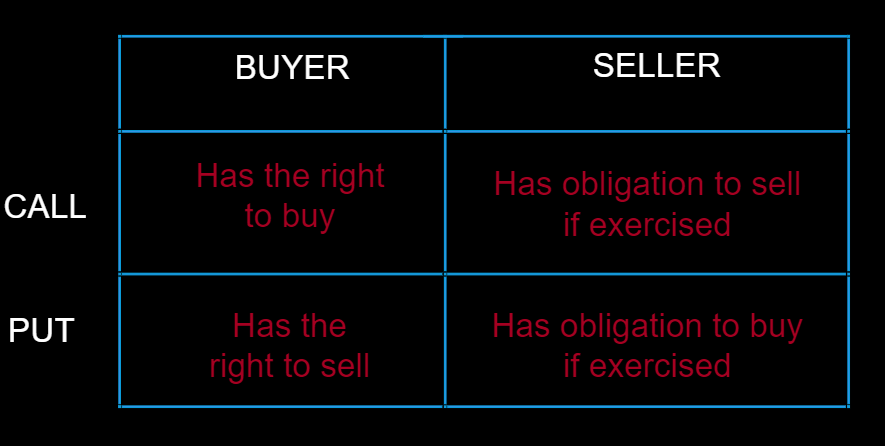

Since the buyer has the right, but not the obligation, the buyer will only exercise the option (use the right) iff the the price of the underlying is above the strike price. This means the buyer will make a profit and the call option is said to be <mark>[in-the-money](https://en.wikipedia.org/wiki/Moneyness)</mark>.   
If the underlying is equal to the strike price, the option holder is indifferent between exercising it and not exercising it.  
<mark>At-the-money</mark> option is where the payoff of a call option and a put option intersects. In case of a call option, as the price of the underlying asset moves above the exercise price, the option is said to be in the money. On the other hand, if price of the underlying asset dives below the exercise price, the option is said to be <mark>out-of-the-money</mark>. The <mark>moneyness</mark> of a put option is just opposite to that of a call option i.e. it is in the money when the price of the underlying asset moves below the exercise price, and out of the money when the price of the underlying asset is higher than the exercise price.

<div class="alert alert-block alert-success">
<b>Tip:</b> At-the-money is determined by the strike price, and not the breakeven point. This is a common misconception. The premium (upfront payment) is sunk cost, just like an insurance premium. Even though the overall return may still be negative, it is efficient to exercise as soon as you can profit. Even if the profit may not be sufficient to cover the entire premium paid.
</div>  

The chart on the right hand side below represents the return distribution of the price of the underlying at the option expiration date. Note that this is assuming a normal distribution of logarithmic returns. 

<div class="alert alert-block alert-success">
<b>Tip:</b> Check out the section "Why the natural logarithm is such a natural choice" for an explantion of this. 
</div>  

This is identical to the canonical Black Scholes model, which assumes that the underlying follows a process called <mark>Geometric Brownian motion</mark>, which implies a <mark>log-normal distribution</mark> of returns, meaning the logarithmic return is normally distributed. 

- If you buy a call option, you are not exposed to the part of the return distirbution that lies to the left of the strike, which is the red area under the bell curve.  
- If you buy a put option, you naturally are exposed to the opposite side of the distribution.   

<div class="alert alert-block alert-success">
<b>Tip:</b> Moneyness does not depend on what side of the trade you are on (if you buy or sell the option). As mentioned above, only the buyer of the option has the right to exercise, whereas the seller has the obligation to honor the contract. Therefore, moneyness is always depending on the buyer, who decides whether to exercise or not. 
</div>


In [21]:
option_type(call)

interactive(children=(FloatSlider(value=170.0, description='strike', max=185.0, min=160.0, step=5.0), FloatSli…

<function __main__.call(strike, premium_call)>

In [24]:
option_type(put)

interactive(children=(FloatSlider(value=170.0, description='strike', max=185.0, min=160.0, step=5.0), FloatSli…

<function __main__.put(strike, premium_put)>

# Synthetic Long Positions
Suppose an investor buys a share of common stock at a price of 170. The investor gains if the price goes up, and loses money if the price declines.   
what happens if the investor simulatenously buys a call and writes (sells) a put with the same expiration date and the same exercise price (strike), say at 170? 
- At expiration, a call is worth the greater of zero or the stock price minus the exercise price. $max(0,  S - x)$
- Likewsie, the put is worth the greater of zero or the exercise price minus the stock price.    

Therefore, the combination of options is equivalent to a long position in the stock, which is why it is frequently called a <mark>synthetic long</mark> position. Clearly, the opposite is also possible, which is called a <mark>synthetic short</mark> position (toggle the function below). 

Technically, this position is not exactly identical to a long position. 
- This is due to the fact that with the stock position, you must pay the total amount at the beginning, when you enter the position. 
- Whereas with the option strategy, you must pay the exercise price at expiration.  
Adding a zero coupon bond to the option strategy (at an amount equivalent to what you "saved" by not entering the stock poistion right away), or setting the present value of the exercise price to the stock price would make the two strategies precisely the same.   
This is a simplified explanation of the so called <mark>Put-Call Parity</mark>: 
$ S + p = PV(X) + c$, where $S + p$ is long the stock and long a put, and $ PV(X) + c $ is lending (the zero coupon bond) and a long call.   

In [25]:
option_type(synthetic_long_underlying)

interactive(children=(FloatSlider(value=170.0, description='strike_atm', max=230.0, min=110.0, step=5.0), Floa…

<function __main__.synthetic_long_underlying(strike_atm, premium_atm, underlying)>

Depending on the context, this equation can be rearranged:
- For example, a call option can be expressed as a position in a stock, financing and a put: 
$c = S - PV(X) + p $. This is also called a <mark>synthetic call</mark>.   
- Likewise, a put options can be expressed as a long call, short the stock and investing the proceeds of the sold stock in a bond: 
$p = c - S + PV(X) $. This is also called a <mark>synthetic put</mark>.

In [26]:
option_type(synthetic_put)

interactive(children=(FloatSlider(value=170.0, description='strike_atm', max=230.0, min=110.0, step=5.0), Floa…

<function __main__.synthetic_put(strike_atm, premium_atm, underlying)>

A synthetic put positions were an important strategy historically. When the <mark>Chicago Board Option Exchange</mark> (CBOE) opened in 1973, there were exchange traded calls but no puts. Regulators were concerned about approving a financial instrument that benefited from falling prices.  
However, it was easy to create such a position synthetically as is clearly demonstrated with the synthetic put. It took until [1973](http://www.cboe.com/aboutcboe/history) until the CBOE added put options. 

# Covered Calls and Protective Puts  
## Covered Calls 
A covered call is a very common strategy where someone who already owns the underlying, sells a call option. If someone writes a call option without owning the underlying, this is called a <mark>Naked Call</mark>.   
What are the implications of this? 
- the investor owns shares
- has the potential obligation to deliver the shares to the option buyer 
- receives a premium for the willingness to do so    

The general shape of the profit and loss diagramme is the same for covered calls and that of writing a put. However, covered call writing is a very common use of options by individual investors, whereas writing puts is very uncommon. 

### Investment Objectives of Covered Calls   
1) **Income generation**: The most common motivation for writing covered calls is income generation. The writer of the option can keep the premium, regardless of what happens in the future. This is reflected in the payoff lying above the underlying in the chart below. However, this strategy implies that the writer of the call option is essentially selling part of the return distribution associated with the underlying asset. The largest returns are those to the far right of the return distribution. Someone writing a call with gives up all returns above above the strike price. There is a clear tradeoff between the size of the option premium and the likelihood of exercise of the option. Note that the diagramme below is not a proper option pricer and does not accurately reflect the premium associated with different strike prices.  

2) **Improving on the market**: Consider a portfolio manager who has become overweight in a specific sector and wants to reduce this imbalance. Assume that the asset manager believes the market price will remain relatively stable. By writing in-the-money options, the likelihood of exercise of these options is very high. This is a desirable outcome for two reasons: 
- reduce the overweight in the portfolio  
- gain extra income from the premium received from writing the option  
An option premium consists of two parts: exercise value (what the payoff diagrammes depict), as well as time value. The option value is generally above the exercise value at any given time prior to the expiration date. Someone who writes covered calls to improve on the market is capturing this time value of money, at the expense of giving up part of the return distribution.   
Let's consider a simple numerical example. By convention, the smallest unit for a listed equity option is usually one contract covering 100 shares.  If the portfolio manager holds 5000 shares of a stock, and decides to write (sell) 10 exchange traded options expiring next month with a strike of 165. Therefore, the buyer of the options receives the right to purchase 1000 shares (100 x 10) at the price of 165. If these options cost 16.4 per contract, the seller receives the option premium of $\frac{16.4}{call}*  \frac{100\ shares}{contract} *  10\ contracts = 16.400$.  
Assume the current price of the underlying is 170. I the option is exercised, the shares are effectively sold at $165 + 16.4 = 181.4$. The investor could have simply sold the shares at the original price of 170.  
This specific example results in an extra income of $ 181.4*1000 - 170*1000 = 11.400$.

3) **Target Price Realization**: This is essentially a hybrid of the first two objectives. The strategy consists of writing a call with an exercise price near the target price. If the price fails to rise above the target price, the portfolio manager could write a new call with the same objective in mind. This should not be confused with free money. Instead of selling now and locking in a potential profit, there is a chance that the target price will never be reached and that the stock depreciates. In this case, there are <mark>two cases of opportunity costs</mark> (losses): the opportunity loss relative to the outright sale of the stock, and the opportunity loss if the stock appreciates above the exercise price. 

In [27]:
option_type(covered_call)

interactive(children=(FloatSlider(value=195.0, description='strike_call_otm', max=230.0, min=110.0, step=5.0),…

<function __main__.covered_call(strike_call_otm, premium_otm, underlying)>

### Profit and Loss of Covered Calls at expiration   
- $S_0$ - stock price when the position is opened
- $S_T$ - stock price at option expiration 
- $X$   - exercise price 
- $c_0$ - call premium received or paid    

The <mark>maximum gain</mark> occurs when the option ends up in-the-money, in which case the options writer is forced to sell the underlying at the strike price, but still gains due to the potential price appreciation up to the strike price and the option premium that is received. The <mark>breakeven</mark> is calculated as the stock price minus the premium, in which case the premium is still sufficient to compensate the loss in the stock position. The <mark>maximum loss</mark> would occur if the stock is worthless, which equals the original stock price minus the option premium received. The <mark>value</mark> of the covered call position at expiration is the stock price minus the exercise value of the call. The <mark>profit</mark> at expiry is the covered call value plus the option premium received, minus the original price of the stock.    
- $(X-S_0) + c_0$ = maximum gain  
- $S_0 - c_0$     = maximum loss 
- $S_0 - c_0$    = breakeven point 
- $S_T - max[S_T-X),0]$     = expiration value 
- $S_T - max[(S_T-X),0] + c_0 -S_0$ = profit at expiration   
<div class="alert alert-block alert-success">
<b>Tip:</b> Note that the maximum loss and the breakeven point are identical. This does NOT mean that the investor cannot lose money.It just means that the price of the underlying at which the investor is break even, is identical the the maximum loss that the investor can suffer.   
Also, it is important to remember that these profit and loss relations depict the situation only at the end of the options life. 
</div>
 

## Protective Put 
When someone simultaneously holds a long position in an asset, and a long position in a put option, this is called a protective put. The name comes from the fact that the put protects against losses in the value of the underlying asset. In that perspective, it is very similar to buying insurance. As with insurance policies, a put implies a deductible, which is the amount of the loss the insured is willing to bear (the stock price minus the exercise price).    

<h2 style='padding: 10px'>Protective Put and Incurance Analogies</h2><table class='table table-striped'>  <tr> <th>Insurance Policy</th> <th>Put Option</th>  </tr>  <tbody> <tr> <td scope='row'>Premium</td> <td>Time Value</td>  </tr> <tr> <td scope='row'>Value os Asset</td> <td>Price of Stock</td>  </tr> <tr> <td scope='row'>Face Value</td> <td>Exercise Price</td> </tr> <tr> <td scope='row'>Term of Policy</td> <td>Time until option expiration</td>  </tr> <tr> <td scope='row'>Likelihood of loss</td> <td>Volatility of Stock</td> </tr> <tr>  </tr> </tbody> </table>     

However, unlike typical insurance policies, it is possible to use a put to insure an asset for more than its current value by setting the exercise price higher than the current stock price. This naturally comes at the cost of a higher price for the option.   

### Profit and Loss of Protective Puts at expiration
- $S_0$ - stock price when the position is opened
- $S_T$ - stock price at option expiration 
- $X$   - exercise price 
- $p_0$ - put premium received or paid 

The <mark>maximum gain</mark> is unlimited as the stock can rise to any level and the investor will fully benefit from any increase. As explained above, the <mark>maximum loss</mark> is capped by the strike price, taking into account the premium paid. The <mark>value</mark> is the greater of the stock price or the exercise price. The <mark>profit at expiration</mark> is equal to the value minus the initial price paid for the stock and the premium paid. <mark>Breakeven</mark> occurs when the price of the underlying increased by the amount paid for the option.  
- $S_T - S_0 - p_0$ = maximum gain  
- $S_0 - X +p_0$     = maximum loss 
- $S_0 + p_0$    = breakeven point 
- $max[S_T, X]$     = expiration value 
- $max[S_T, X] - S_0 - p_0$ = profit at expiration   


In [28]:
option_type(protective_put)

interactive(children=(FloatSlider(value=145.0, description='strike_put_otm', max=230.0, min=110.0, step=5.0), …

<function __main__.protective_put(strike_put_otm, premium_otm, underlying)>

### The Risk of Covered Calls and Protective Puts  
Many people believe derivatives are inherently risky and inappropriate for conservtive investment objectives. However, this is not true in general.     
A <mark>covered call</mark> position is *less* risky than the underlying held alone. Even if the stock declines to zero, the loss is mitigated by the premium received from writing the option. The major downside is that you give up the potential for "big gains" as was explained above and can be seen be the red area underneath the return distribution to the right hand side.   
As shown, a <mark>protective put</mark> is essentially equivalent to buying insurance. Continually purschasing puts can be an expensive strategy that would wipe out most of the long-term gain on an otherwise good investment. However, occasionally buying protection can be a sensible risk reduction activity. 

# A note on the equivalence of Positions 
Consider three different positions: 
- at-the-money covered call
- at the money protective put 
- long stock and short forward position  
Now, at the money options have a delta of about 0.5 in absolute value. (delta of a call is roughly 0.5 and the delta of a put is close to -0.5). A forward is closely moving with the price of the underlying and as such has a delta of approximately plus 1 or minus one. Therefore,
- covered call is long the stock ($\delta = 1$) and short a call ($\delta \approx -0.5$) -> combined $\delta = 0.5$
- protective put is also long the stock ($\delta = -1$) and long put ($\delta \approx - 0.5$) -> combined $\delta = 0.5$
- long stock ($\delta = 1$) and short a forward with a notional of 50% of the total value of the position in stock. the ($\delta = -1$) of the short forward but it only cancels half the positions. Therefore, the position $\delta = 0.5$ as well.   
In other words, for small movements in the price of the underlying, these positions will have very similar gains and losses. 

# Collars  
A collar is a position in which the investor is long shares, and buys a put with a strike below the current stock price and write a call with an exercise price above stock price. Therefore, both positions are initially out the money. The main appeal of this strategy is that it allows the investor to acquire downside protection through a <mark>protective put</mark>, while at the meantime reducing the cash outlay by writing a <mark>covered call</mark>. In terms of the return distribution, the collar sacrifices the positive part of the return distribution in exchange for the removal of the adverse portion. 

A collar is also called a <mark>fence</mark> or a <mark>hedge wrapper</mark> and in foreign exchange transactions, it is frequently called a risk reversal. OVML RR is a <mark>risk reversal</mark> but without a poistion in the underlying.

<div class="alert alert-block alert-success">
<b>Tip:</b> Most collars are structured so that the call and put premiums completely offset each other. This is mostly achieved by setting the strike on one leg (e.g. the call), and solving for the equivalent strike of the other leg (the put). To achieve this, most collars are traded OTC (over-the-counter) because the strike of one leg must be freely chooseable. This would be impossible with listed options that have standardized exercise prices. Note, the chart below is not solving for this. You can freely choose any strike you want and the premiums will be unaffected and always offset each other. 
</div>   
If the price is identical for both options, you end up with a synthetic forward position. In this case, holding the asset and selling a synthetic forward is completely neutralizing market swings. If one position gains, the other position is losing. In other words, you give up the entire return distribution. Try setting the strikes equal to each other and also load the risk reversal template, which resembles a standard OVML RR deal. 

In [29]:
option_type(collar)

interactive(children=(FloatSlider(value=195.0, description='strike_call_otm', max=230.0, min=110.0, step=5.0),…

<function __main__.collar(strike_call_otm, strike_put_otm, premium_otm, underlying)>

# Spreads and Combinations  
- **Spreads** involve buying a call or put and writing another call or put   
They can be classified in two ways:     
1) <u>market sentiment</u>: a spread that becomes more valuable when the price of the underlying rises is a <mark>bull spread</mark>, the opposite is called a <mark>bear spread</mark>    
2) <u>direction</u> of the initial cashflow: because the investor buys one option and sells another, there is typically a net cash outflow, called <mark>debit spread</mark>, or a cash inflow, called <mark>credit spread</mark>. A credit spread is effectively short, because the short option value exceeds the long option value. 
<div class="alert alert-block alert-success">
<b>Tip:</b> Any of these strategies can be created with puts or calls. Check out the various option types in the dropdown. 
</div>    
The main motivation is usually to place a directional bet, while giving up part of the profit potential in exchange for a lower up front cost. 
- **Combinations** typically uses both calls and puts. Straddles, Stangles and butterflies are examples. 

## Bull Spreads and Bear Spreads   
A <mark>bull spread</mark> requires buying one option and writing another with a higher strike price, irrespective if the investor contructs this with calls or puts. The general rule is to buy high and sell low for bears spreads, and buy low and sell high for bull spreads.   
<div class="alert alert-block alert-success">
<b>Tip:</b> American exercise-style options may be exercised at any time prior to expiration. In this case, bull spreads with calls and bear spreads with puts are generally preferred. This is because a bull spread with puts has the additional risk that the short put gets exercised early, whereas the long put is not yet in the money. If the bull spread uses calls, and the short call is exercised, the long call is deeper in the money, which offsets that risk. The [incentive to exericse)](https://quant.stackexchange.com/questions/3486/exercising-an-american-call-option-early) early is also lower for american-style call options. Similar logic applies to bear spreads using calls. 
</div>    

If constructed with call options, the following relationships hold: 
- $X_H$ - Strike High
- $X_L$ - Strike Low 
- $c_L$ - Call premium associated with Strike Low (ITM Strike)
- $c_H$ - Call premium associated with Strike High (OTM Strike)  


- $X_L + (c_L-c_H)$ = Breakeven  
- $X_H - X_L - (c_L-c_H)$ = Maximum Profit   
- $c_L-c_H$ = Net Cost of buying ITM call and selling OTM call    

We will leave it up to you to figure out how the these relationships are for a bull spread that is constructed with put options. The chart will help you verify this. By carefully selecting the expiration and exercise price for the two legs, the investor can choose the risk-return mix that most closely matches the investors investment outlook. 

In [30]:
option_type(bull_spread)

interactive(children=(FloatSlider(value=145.0, description='strike_call_itm', max=230.0, min=110.0, step=5.0),…

<function __main__.bull_spread(strike_call_itm, strike_call_otm, premium_itm, premium_otm)>

A <mark>bear spread</mark> requires buying one option and writing another with a lower strike price, irrespective if the investor contructs this with calls or puts. 
- $X_H$ - Strike High
- $X_L$ - Strike Low 
- $p_L$ - Put premium associated with Strike Low (OTM Strike)
- $p_H$ - Put premium associated with Strike High (ITM Strike)  


- $X_H + (p_H-p_L)$ = Breakeven  
- $X_H - X_L - (p_H-p_L)$ = Maximum Profit   
- $p_H-p_L$ = Net Cost of buying ITM call and selling OTM call    

We will gain leave it up to you to figure out how the these relationships are for a bear spread that is constructed with call options.

In [22]:
option_type(bear_spread_call)

interactive(children=(FloatSlider(value=145.0, description='strike_call_itm', max=230.0, min=110.0, step=5.0),…

<function __main__.bear_spread_call(strike_call_itm, strike_call_otm, premium_itm, premium_otm)>

### Refining Spreads  
It is not neccessary to enter both legs at the same time or maintain them for the same period. Over the counter (OTC) options a very versatile and can by quickly adjusted to changes in market conditions. Below are some examples outlining this.    

1) **Adding a short leg to a long position**: Assume that a long call option was very profitable and the investor believes that the underlying is likely to stabilize around its new level and does not believe it will go much higher. By writing a call option with a higher strike, the investor converts the long call into a bull spread. This creates a completely different situation now: 
- the maximum profit will be capped as explained above 
- if the underlying unexpectedly falls significantly and below the strike of the long call, both options are out-of-the-money and the premium received from writing the call at least resulted in a cash inflow that wouldnt exist without this position 
- between the two strikes, the exercise value rises steadily as the underlying increases. If the underlying price remains unchanged, there is an additional income from writing the call option and teh investor also benefits  
However, there is an <mark>opportunity loss</mark>. The profit would get progressively smaller if the price of the underlying is trending back to the strike of the long call.   
The investor could also choose to only write higher strike calles against part of the long call position which leaves some upside potential if the underying continues to rise. This can be extended further if the investors writes several calls with different strike, thereby slowly reducing the upside potential while at the same time generating cash inflows from the received premiums.  

2) **Calendar Spreads**: Strategies where someone sells a near-dated call and buys a longer-dated call on the same underlying and the same strike price are commonly referred to as a calendar spread. If you buy the near-dated and sell the longer-dated option is is a <mark>short calendar spread</mark>. These strategies can also be built with put options. As explained above, a portion of the option premium is time value, which decays over time and approaches zero as the option expires. Taking advantage of this <mark>time decay</mark> is a primary motivation behind calendar spreads. Time decay is more pronounced for a short term option. Investors can exploit this characteristic by purchasing a longer-term option and selling a shorter-term option. Option traders typically measure tiume decay with <mark>theta</mark>, one of the greeks we will explain in the section on option greeks.    
The following example will illustrate a usage case. Assume a firm has a announces a new product that will be launched some time in the future. If an investor believes that this new product will have a positive impact on the share price, but that the stock price is not yet reflecting this. The investor can sell a near-dated call, and buy a long-dated call. If the option price does not rise in the near term, the option will expire with no value and the investor received the premium, while still having the long call to benefit from the expected increase in price.   

3) **Spreads as Volatility Plays**: A spread strategy can make sense with a volatile underlying in a trending market. Suppose the market has been rising, and an investor expects this trend to continue. If the investor buys a long call options and the underlying increases, the investor can establish a <mark>bull call spread</mark>. Due to volatility, it is likely the price fluctuates a lot and may fall. In this case, the investor can close out the position of the short call position with the higher strike by buying it back, while keeping the long position. This can be done repeatedly. Obviously, all these examples rely on the premise that the market is behaving in a certain way. In reality, it will be very hard to time the market and correctly forecast future paths.   

# Straddles, Strangles and Butterflies 
### Straddles 
All strategies mentioned in this section are essentially volatility plays as well. A <mark>long straddle</mark> is a combination of puts and calls with the same exercise prcie on the same underlying. If someone writes both options, it is a <mark>short straddle</mark>.    
A long call is [bullish](https://www.investopedia.com/insights/digging-deeper-bull-and-bear-markets/) and a long put is bearish. In that sense this strategy seems illogical. However, there are occasions when this might make sense. Assume a company that produces electric cars but has a tendency to disappoint with production numbers due to bottlenecks in the assembling process. The general trend is upward, but any negative news can have a detrimental affect on the stock price, at least in the short run. There is a large risk of volatility and movements in both directions at the time the next financial statement is released. If the investor establishes a long straddle, the direction does not matter. It is a directional play on the underlying volatility, with the view hat volatility will increase. Naturally, a <mark>short straddle</mark> is the opposite view. The exercise price is usually close to the current market price. Otherwise, there is a directional bias because initally one option will be ITM and the other OTM.  
<div class="alert alert-block alert-success">
<b>Tip:</b> If you think this sounds too good to be true, you are right. To make money, the straddle buyer has to be corect in the view that the "true" underlying volatility is higher than the market consensus, which will be reflected in the cost of this strategy. 
</div>   
The worst outcome is if the stock closes exactly at the strike, in which case both expire worthless. This is the best outcome if you are short a straddle, as you received the premiums and do not have to pay anything. Volatility is traditionall measured in annualized percentage terms. <mark>Implied volatility</mark> is often a market quote or backed out form listed option pricing. <mark>Historical volatility</mark> is predominantly calculated as the annualized standard deviation of log returns. 
- annual variance $\sigma^2$ can be converted to daily variance by dividing by 252 
252 is a common convention as markets are not open on Saturdays, Sundays as well as official holidays. The price cannot move when markest are closed. Therefore, those days should not count. 
- annual standard deviation can be converted into daily SD by $\frac{\sigma}{\sqrt252}$

### Include a section with historical vola nd implied vol and explanations (replicate HVT or VOLC or both) 

Now, let's consider a simple example. Suppose the underlying typically has an annual volatility of 35%. Assume the current price of the underlying is 170. And for simplicity, both the call and put with an ATM strike cost 10. Therefore, the price of the underlying needs to move by $\pm$20 to breakeven, which corresponds to a 11.76% move. Suppose it is a 1 month option and there are 21 trading days until epxiration. The 11.76% move in 21 days can be converted into an annual measure by multiplying by the square root of the number of 21 day periods in a 252 day year $\sigma^2*\sqrt{\Bigg(\frac{252}{21}\Bigg)}$. The result of 40.75% is well above the 35% historical volatility. Only if you believe that such a price movement is reasonably likely is it worth entering into a straddle. 

In [32]:
movement = 20/170
days_expiry = 21
days_year = 252
percent_move = round(movement*100,2)
percent_move_annualized = round(percent_move*math.sqrt(days_year/days_expiry),2)
print("{}% movement over {} days.".format(percent_move, days_expiry))
print("Which corresponds to a annualized movement of {}".format(percent_move_annualized))

11.76% movement over 21 days.
Which corresponds to a annualized movement of 40.74


In [33]:
option_type(straddle)

interactive(children=(FloatSlider(value=170.0, description='strike_atm', max=230.0, min=110.0, step=5.0), Floa…

<function __main__.straddle(strike_atm, premium_atm)>

### Strangles
A <mark>Strangle</mark> is identical to a strangle but using OTM strikes for the call and the put. While a straddle has no directional bias, a strangle can used when the investor believes the stock has a better chance of moving in a certain direction, but would still like to be protected in the case of an adverse move. Furthermore, the OTM positions are cheaper compared to ATM calls and puts. By purchasing the options at different strike prices, the trader can actually save a bit of money that is paid for the options themselves. An options strangle is a bit higher risk, however. That’s because the differing strike prices make it slightly more difficult to produce a profit as the underlying needs to move eben more to break even. 

In [34]:
option_type(strangle)

interactive(children=(FloatSlider(value=195.0, description='strike_call_otm', max=230.0, min=110.0, step=5.0),…

<function __main__.strangle(strike_call_otm, strike_put_otm, premium_call, premium_put)>

### Butterflies
A [butterfly](https://en.wikipedia.org/wiki/Butterfly_(options) can be constructed in various ways. It can be a combination of a long calls or long puts at different strikes. If using calls, the investors buys one call with a low strike, sells a call with twice the notional of the first call and enters another call with a higher strike. It can also be constructed by combining a straddle with a strangle. The dropdown allows you to display two different ways a butterlfy can be constructed. 
- A long butterfly position is entered when the investor thinks that the underlying stock will not rise or fall much by expiration. The benefit compared to a short straddle position is that there is protection on the downside, as can be seen on the red section of the return distribution. This comes at the cost of premium payments for the strangle position.
- Naturally, a short butterfly position has the exact opposite cashflow. 


In [23]:
option_type(butterfly)

interactive(children=(FloatSlider(value=145.0, description='strike_call_itm', max=230.0, min=110.0, step=5.0),…

<function __main__.butterfly(strike_call_itm, strike_call_otm, strike_atm, premium_itm, premium_otm, premium_atm)>

why OTC options ofted quoted in implied vol P. 472 + P. 417


Distributions

In [24]:
import math
from decimal import Decimal
import numpy as np
import pandas as pd 

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

from scipy.stats import norm, shapiro
from scipy.integrate import quad

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.api as sm

from IPython.display import HTML, display
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
from numpy.random import seed
from numpy.random import randint
from numpy import mean

P. 388
basic statistical fact that binomial proces with a large number of steps converges to the standard normal distribution. 
buil BSM model 

[math unl](http://www.math.unl.edu/~sdunbar1/ProbabilityTheory/Lessons/BernoulliTrials/LocalLimitTheorem/locallimittheorem.pdf)

A local limit theorem describes how the probability mass function of a sum
of independent discrete random variables approaches the normal density.
We observe that the histogram of a sum of independent Bernoulli random
variables resembles the normal density. From the Central Limit Theorem, we
see that in standard units the area under the one bar of a binomial histogram
may be approximated by the area under a standard normal. Theorems which
compare the probability of a discrete random variable in terms of the area
under a bar of a histogram to the area under a normal density are often
called local limit theorems

Pascal laid the foundation for the local limit theorem when
he formulated the binomial probability distribution for a Bernoulli random
variable with p = 1/2 = q. James Bernoulli generalized the distribution to
the case where p 6= 1/2. De Moivre proved the first real local limit theorem
for the case p = 1/2 = q in essentially the form of Lemma 9 in The de
Moivre-Laplace Central Limit Theorem. Laplace provided a correct proof
for the case with p 6= 1/2. De Moivre then used the local limit theorem
to add up the probabilities that Sn is in an interval of length of order √
n
to prove the Central Limit Theorem. See Lemma 10 and following in The
de Moivre-Laplace Central Limit Theorem. Khintchine, Lyanpunov, and
Lindeberg proved much more general versions of the Central Limit Theorem
using characteristic functions and Fourier transform methods.

Algorithm
The experiment is flipping a coin n times, and repeat the experiment k
times. Then check the probability of a specific value and compare to the
10
normal probability density. Also compare the logarithmic rate of growth to
the predicted rate.

In [25]:
import scipy
p = 0.5
n = 10000
k = 1000

upper_intvalue = 10
lower_intvalue = 0
win_lose = 2*(scipy.random.random(( n , k))<= p ) - 1
# Note Booleans True f o r Heads and F al s e f o r T a i l s
totals = scipy.sum(win_lose , axis = 0)

stddev = scipy.sqrt(p * (1 - p) * n)
prob = (scipy.sum(totals == upper_intvalue)).astype("float")/k

f1 = (scipy.sqrt(2 / scipy.pi ));
f2 = (p / ( 1 - p ) )**(upper_intvalue/ 2 );
f3 = (( 2 * scipy.sqrt(p * (1 - p)))**n) / scipy.sqrt(n);
f4 = scipy.exp(-(upper_intvalue * 2 / (2.0 *n)));

theoretical  = f1 * f2 * f3 * f4;
print (" Em pi ri cal p r o b a b i l i t y: ", prob)
print ("Moderate D e via tio n s Theorem e s tima t e : " , theoretical)

set = (totals >= lower_intvalue) & (totals <= upper_intvalue)
#log_interval_prob_rate = (1 / n) * scipy.log((scipy.sum(set)).astype("float")/k
                                                                                        
theroetical_log_rate = scipy.log( 2 * scipy.sqrt(p * (1 - p)))
#print("Em pi ri cal l o g p r o b a b i l i t y r a t e : ", log_interval_prob_rate)
print("T h e o r e t i c al l o g r a t e : " , theroetical_log_rate)

 Em pi ri cal p r o b a b i l i t y:  0.007
Moderate D e via tio n s Theorem e s tima t e :  0.007970870750513954
T h e o r e t i c al l o g r a t e :  0.0


[PDF and CDF explanation](http://work.thaslwanter.at/Stats/html/statsDistributions.html)   
Watch out: in Python, by default the variance is calculated for “n”. You have to set “ddof=1” to obtain the variance for “n-1

In [29]:
import numpy
data = np.arange(7,14)
print(data)
print(np.mean(data))
print(np.mean(data)/len(data))
print(np.std(data, ddof=0))
print(np.std(data, ddof=1))


[ 7  8  9 10 11 12 13]
10.0
1.4285714285714286
2.0
2.160246899469287


In [23]:
from scipy import stats
mu = -2
sigma = np.sqrt(0.5)
myDistribution = stats.norm(mu, sigma)
significanceLevel = 0.05
myDistribution.ppf([significanceLevel/2, 1-significanceLevel/2])
np.array([-3.38590382, -0.61409618])

array([-3.38590382, -0.61409618])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'builtin_function_or_method'

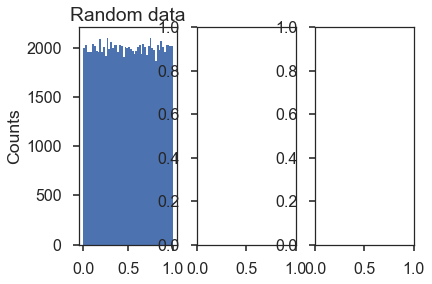

In [29]:
'''
Practical demonstration of the central limit theorem

'''

# author: Thomas Haslwanter, date: July-2014

# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# additional packages
#import mystyle

sns.set(context='poster', style='ticks')

def main():
    '''Demonstrate central limit theorem.'''
    # Generate data
    ndata = int(100000)
    nbins = 50
    data = np.random.random(ndata)
    
    # Show them
    fig, axs = plt.subplots(1,3)
    #mystyle.set(14)
    #sns.set_context('paper')
    #sns.set_style('whitegrid')
    
    axs[0].hist(data,bins=nbins)
    axs[0].set_title('Random data')
    axs[0].set_xticks([0, 0.5, 1])
    axs[0].set_ylabel('Counts')
    
    axs[1].hist(np.mean(data.reshape((ndata/2,2)),  axis=1), bins=nbins)
    axs[1].set_xticks([0, 0.5, 1])
    axs[1].set_title(' Average over 2')
    
    axs[2].hist( np.mean(data.reshape((ndata/10,10)),axis=1), bins=nbins)
    axs[2].set_xticks([0, 0.5, 1])
    axs[2].set_title(' Average over 10')
    
    plt.tight_layout()
    #mystyle.printout_plain('CentralLimitTheorem.png')
    
    plt.show()    
    
if __name__ == '__main__':
   main() 

[look this up](https://rajeshrinet.github.io/blog/2014/central-limit-theorem/)

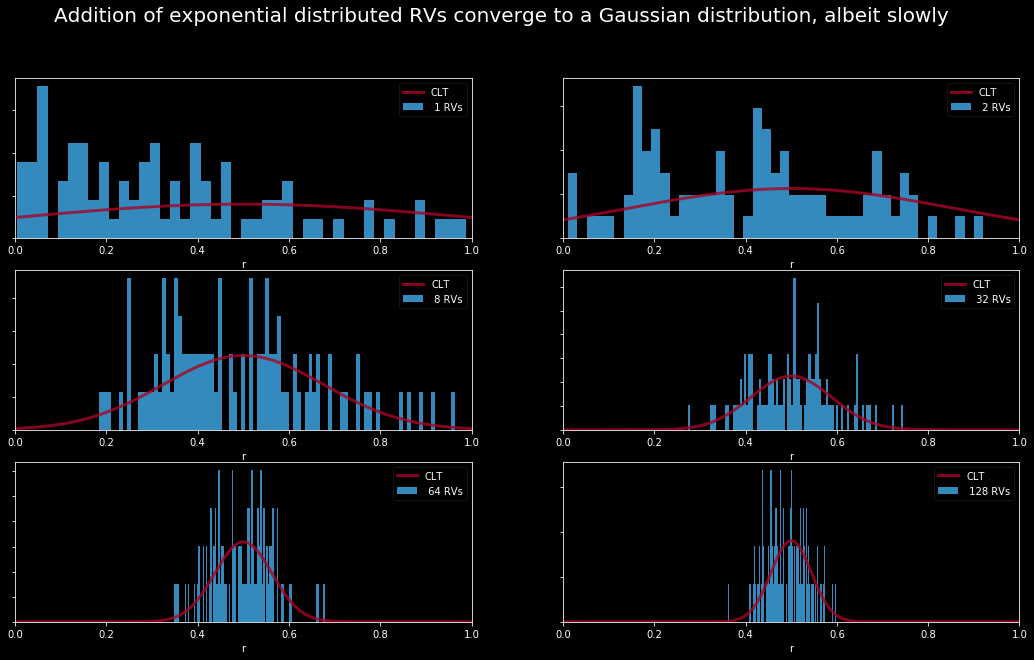

In [25]:
f = plt.figure(figsize=(18, 10))
 
def plotHist(nr, N, n_, mean, var0, x0):
    ''' plots the RVs'''
    x = np.zeros((N))
    sp = f.add_subplot(3, 2, n_ )
    
    for i in range(N):    
        for j in range(nr):
            x[i] += np.random.exponential(mean) 
        x[i] *= 1/nr
    plt.hist(x, 100, density=True, color='#348ABD', label=" %d RVs"%(nr));
    plt.setp(sp.get_yticklabels(), visible=False)
    
    variance = var0/nr                     
    fac = 1/np.sqrt(2*np.pi*variance)
    dist = fac*np.exp(-(x0-mean)**2/(2*variance))
    plt.plot(x0,dist,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    plt.xlabel('r')
    plt.xlim([0, 1])
    leg = plt.legend(loc="upper right")
    leg.get_frame().set_alpha(0.1)

    
N = 100   # number of samples taken
nr = ([1, 2, 8, 32, 64, 128])

mean, var0 = 0.5, 0.5*0.5  # mean and variance of exponential distribution
x0 = np.linspace(0, 1, 128)

for i in range(np.size(nr)):
    plotHist(nr[i], N, i+1, mean, var0, x0)

plt.suptitle("Addition of exponential distributed RVs converge to a Gaussian distribution, albeit slowly",fontsize=20);

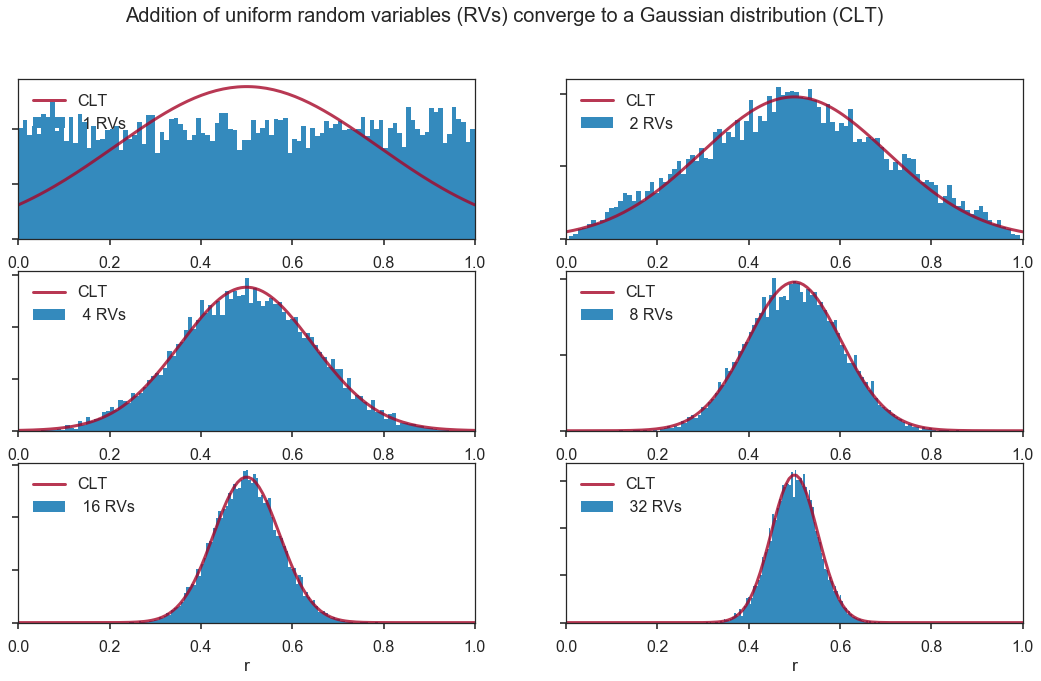

In [30]:
fig = plt.figure(figsize=(18, 10))
 
def plotHist(nr, N, n_, mean, var0, x0):
    ''' plots the RVs'''
    x = np.zeros((N))
    sp = fig.add_subplot(3, 2, n_ )
    
    for i in range(N):    
        for j in range(nr):
            x[i] += np.random.random() 
        x[i] *= 1/nr
    plt.hist(x, 100, density=True, color='#348ABD', label=" %d RVs"%(nr))
    plt.setp(sp.get_yticklabels(), visible=False)
    
    variance = var0/nr                     
    fac = 1/np.sqrt(2*np.pi*variance)
    dist = fac*np.exp(-(x0-mean)**2/(2*variance))
    plt.plot(x0,dist,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    plt.xlabel('r')
    plt.xlim([0, 1])
    leg = plt.legend(loc="upper left")
    leg.get_frame().set_alpha(0.1)

    
N = 10000   # number of samples taken
nr = ([1, 2, 4, 8, 16, 32])

mean, var0 = 0.5, 1.0/12  # mean and variance of uniform distribution in range 0, 1
x0 = np.linspace(0, 1, 128)

for i in range(np.size(nr)):
    plotHist(nr[i], N, i+1, mean, var0, x0)

plt.suptitle("Addition of uniform random variables (RVs) converge to a Gaussian distribution (CLT)",fontsize=20);

In [31]:
import scipy.stats as st
X = st.bernoulli(0.25)
# Take 10 samples:
X.rvs(20)


array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

[scipy distributions](http://www.math.purdue.edu/~lin491/ME597/lec_03.pdf)

In [32]:
X = st.binom(10, 0.25) # N, theta
# Take samples.
X.rvs(10)


array([1, 4, 2, 6, 4, 3, 1, 0, 2, 0])

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# from wand.image import Image
# from wand.display import display
%matplotlib notebook

[source below](https://machinelearningmastery.com/a-gentle-introduction-to-the-central-limit-theorem-for-machine-learning/)

In [ ]:

# seed the random number generator
seed(1)
# generate a sample of die rolls
rolls = randint(1, 7, 50)
print(rolls)
print(mean(rolls))

In [ ]:

# demonstration of the central limit theorem

# seed the random number generator
seed(1)
# calculate the mean of 50 dice rolls 1000 times
means = [mean(randint(1, 7, 1000)) for _ in range(100000)]
# plot the distribution of sample means
pyplot.hist(means)
pyplot.show()

In [ ]:
count, bins, ignored = plt.hist(means, 50, align='mid')

4.0052720285557415


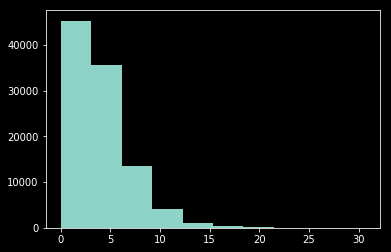

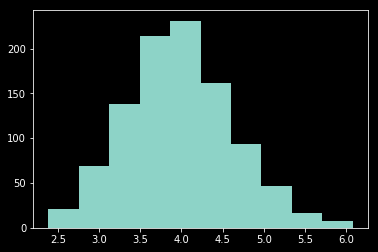

In [27]:
import numpy as np
import random


# Create a parent distribution, from the gamma family
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 100000)
print(np.mean(s))
import matplotlib.pyplot as plt
import scipy.special as sps
plt.hist(s)
plt.show()


# The distribution of the means from the sampled groups is normally distributed
samples = [ np.mean(random.choices(s, k=20)) for _ in range(1000) ]
plt.hist(samples)
plt.show()

FX OVML BF: show how to get it to look exactly like the textbook BF 

In [ ]:
a = BlackScholes('c',100,100,0.005, 0.06, 0.4, 0)
b = BlackScholes('c',101,100,0.005, 0.06, 0.4, 0)
print("delta bump and reprice = {}".format(b-a))
new_call_delta_approx = a+0.5285710345530259*(101-100)
print("New call value = {}".format(new_call_delta_approx))
print("error ={}".format(b-new_call_delta_approx)) # get bump and reprice gamma as well 

In [13]:

import matplotlib.pyplot as matplt
import numpy as np

In [97]:
import numpy as np
import sympy as sy
from sympy.stats import *
sy.init_printing()
x,y  = sy.symbols('x,y')

In [93]:
N = Normal("normal",0.0,1.0)


In [98]:
sy.expand((x+y)**3)

In [102]:
# define BSM variables 
stock, dividend_yield,time, strike_BSM,risk_free_rate,sigma  = sy.symbols('stock, dividend_yield, time, strike_BSM, risk_free_rate, sigma')

# define Nomral distribution 
N = syNormal("Gaussian",0.0,1.0)
# define BSM model
d1 = ((sy.ln(stock / strike_BSM) + (risk_free_rate - dividend_yield + 0.5 * sigma **2) * time) / (sigma * sy.sqrt (time)))
d2 = d1 - sigma * sy.sqrt(time) 
# get BSM call values
call_price = stock * sy.exp(-dividend_yield*time) * N - strike_BSM * sy.exp(-risk_free_rate*time)  * N

                        


In [103]:
sy.diff(call_price,stock)

In [28]:
from scipy.stats import norm
from math import *

def BlackScholesCall(stock,strike_BSM,risk_free_rate,sigma,time,dividend_yield):
    # get variables for formula
    d1 = ((log(stock / strike_BSM) + (risk_free_rate - dividend_yield + 0.5 * sigma **2) * time) / (sigma * sqrt (time)))
    d2 = d1 - sigma * sqrt(time) 
    # get BSM call values
    call_price = stock * exp(-dividend_yield*time) * norm.cdf(d1) - strike_BSM * exp(-risk_free_rate*time)  * norm.cdf(d2)
    # get Greeks
    delta_call = exp(-dividend_yield*time)*norm.cdf(d1)
    gamma_c = exp(-dividend_yield*time)*norm.pdf(d1) / (stock * sigma * sqrt(time) )
    theta_call = -exp(dividend_yield*time)*(stock * norm.pdf(d1) * sigma / (2 * sqrt(time))) - (risk_free_rate * strike_BSM * exp(-risk_free_rate*time) * norm.cdf(d2)) + dividend_yield * stock * exp(dividend_yield*time)*norm.cdf(d1)
    rho_call = ( strike_BSM * time * exp(-risk_free_rate*time) * norm.cdf(d2))
    vega_c = stock * exp(-dividend_yield*time)*norm.pdf(d1) * sqrt(time)
    data = {
    'Parameters': ['Price Put','Delta Put','Gamma Put','Theta Put', 'Rho Put', 'Vega'],
    'Values': [call_price,delta_call, gamma_c, theta_call,  rho_call, vega_c]
    }
    df = pd.DataFrame(data)
    return df
    return gamma_c
        
        
def BlackScholesPut(stock,strike_BSM,risk_free_rate,sigma,time,dividend_yield):
    d1 = ((log(stock / strike_BSM) + (risk_free_rate - dividend_yield + 0.5 * sigma **2) * time) / (sigma * sqrt (time)))
    d2 = d1 - sigma * sqrt(time)
    # Put Value
    put_price = strike_BSM * exp(-risk_free_rate*time)  * norm.cdf(-d2) - stock * exp(-dividend_yield*time) * norm.cdf(-d1) 
    # Greeks
    delta_put =  -exp(-dividend_yield*time)*(norm.cdf(-d1))
    gamma_p = strike_BSM*exp(-risk_free_rate*time)*norm.pdf(d2) / (stock**2 * sigma * sqrt(time) )
    theta_put = -exp(dividend_yield*time)*(stock * norm.pdf(d1) * sigma / (2 * sqrt(time))) + (risk_free_rate * strike_BSM * exp(-risk_free_rate*time) * norm.cdf(d2)) - dividend_yield * stock * exp(dividend_yield*time)*norm.cdf(d1)   
    rho_put = (-strike_BSM * time * exp(-risk_free_rate*time) * norm.cdf(-d2))
    vega_p = strike_BSM * exp(-risk_free_rate*time) * norm.pdf(d2) * sqrt(time)
    data = {
    'Parameters': ['Price Put','Delta Put','Gamma Put','Theta Put', 'Rho Put', 'Vega'],
    'Values': [put_price,delta_put, gamma_p, theta_put,  rho_put, vega_p]
    }
    df = pd.DataFrame(data)
    return  df
    
    

In [29]:
import pandas as pd

In [34]:
BSMPut = BlackScholesPut(170, 170, 0.005, 0.06, 0.4, 0.)
BSMCall = BlackScholesCall(170, 170, 0.005, 0.06, 0.4, 0.)

In [31]:
start_value = 100
BSMCall = BlackScholesCall(start_value, 101, 0.005, 0.06, 0.4, 0.)
BSMCall_bump = BlackScholesCall(start_value*1.01, 101, 0.005, 0.06, 0.4, 0.)

delta = BSMCall['Values'][1]
original_price = BSMCall['Values'][0]
new_price      = BSMCall_bump['Values'][0]

print("Analytical delta = {} whereas delta from bump and reprice = {}".format(delta,new_price-original_price))

Analytical delta = 0.4244445884292376 whereas delta from bump and reprice = 0.4764593437205207


In [32]:
price = BSMCall['Values'][0]
delta = BSMCall['Values'][1]
gamma_c = BSMCall['Values'][2]
gamma_c

0.10323941090798959

Taylor expansion at n=1 (x - 100)*cos(100) + sin(100)


<IPython.core.display.Javascript object>


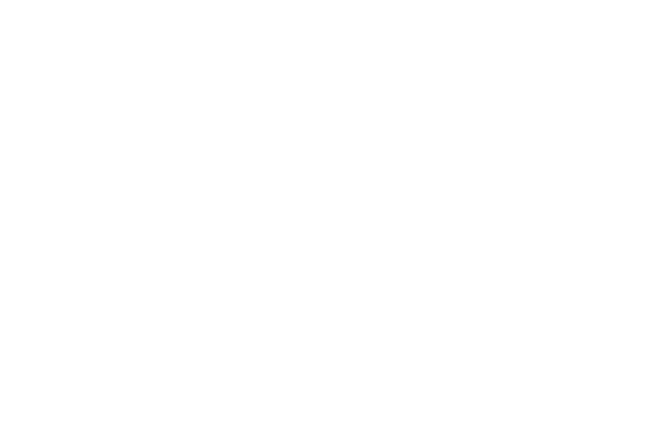

Taylor expansion at n=3 -(x - 100)**3*cos(100)/6 - (x - 100)**2*sin(100)/2 + (x - 100)*cos(100) + sin(100)
Taylor expansion at n=5 (x - 100)**5*cos(100)/120 + (x - 100)**4*sin(100)/24 - (x - 100)**3*cos(100)/6 - (x - 100)**2*sin(100)/2 + (x - 100)*cos(100) + sin(100)


<IPython.core.display.Javascript object>


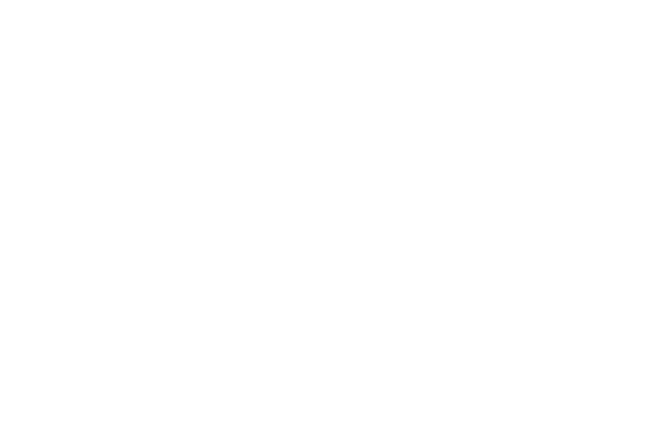

In [38]:
# Taylor expansion # Plot results expansions for any function
import sympy as sy
import numpy as np
from sympy.functions import sin,cos
import matplotlib.pyplot as matplt



# Define the variable and the function to approximate
x = sy.Symbol('x')
f = sin(x)

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p
# Plot results
def plot():
    x_lims = [-5,5]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    y1 = []
    # Approximate up until 10 starting from 1 and using steps of 2
    for j in range(1,6,2):
        func = taylor(f,100,j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
    # Plot the function to approximate the function
    matplt.legend(fontsize = 12)
    matplt.xlabel('Price of the underlying',fontsize = 12)
    matplt.ylabel('Call Value',fontsize = 12)
    
    matplt.style.use("ggplot")
    matplt.plot(x1,np.sin(x1),label='BSM')
    matplt.xlim(x_lims)
    matplt.ylim([-5,5])
    matplt.xlabel('x')
    matplt.ylabel('y')
    matplt.legend()
    matplt.grid(True)
    matplt.title('Taylor series approximation')
    matplt.show()

plot()

In [43]:
def BSMCall(stock,strike_BSM,risk_free_rate,sigma,time,dividend_yield):
    d1 = ((log(stock / strike_BSM) + (risk_free_rate - dividend_yield + 0.5 * sigma **2) * time) / (sigma * sqrt (time)))
    d2 = d1 - sigma * sqrt(time) 
    call_price = stock * exp(-dividend_yield*time) * norm.cdf(d1) - strike_BSM * exp(-risk_free_rate*time)  * norm.cdf(d2)
    return call_price
def BSMPut(stock,strike_BSM,risk_free_rate,sigma,time,dividend_yield):
    d1 = ((log(stock / strike_BSM) + (risk_free_rate - dividend_yield + 0.5 * sigma **2) * time) / (sigma * sqrt (time)))
    d2 = d1 - sigma * sqrt(time)
    # Put Value
    put_price = strike_BSM * exp(-risk_free_rate*time)  * norm.cdf(-d2) - stock * exp(-dividend_yield*time) * norm.cdf(-d1) 
    return put_price
    
def BlackScholesCallTaylor(stock,strike_BSM,risk_free_rate,sigma,time,dividend_yield):
    S = np.arange(strike_BSM-30,strike_BSM+30)
    
    # get delta and gamma for approximation
    BSMC = BlackScholesCall(stock,strike_BSM,risk_free_rate,sigma,time,dividend_yield)
    price = BSMC['Values'][0]
    delta = BSMC['Values'][1]
    gamma_c = BSMC['Values'][2]
   
    matplt.figure(figsize=(12,7))
    matplt.style.use('dark_background')
    
    # iterate through all i to get linear delta approximation
    delta_approx = []
    for i in S:
        delta_approx.append(price+delta*(i-stock))
    matplt.plot(S,delta_approx, label = 'Delta approximation',linewidth=1, linestyle='dashed',color='r')

    # same as for delta but including gamma
    gamma_approx = []
    for i in S: 
        gamma_approx.append(price+delta*(i-stock)+(gamma_c/2)*((i-stock)**2))
    matplt.plot(S,gamma_approx, label = 'Delta-plus-gamma approximation', linewidth=1, linestyle='dashed',color='g')

    value_call = [BSMCall( i, strike_BSM,risk_free_rate,sigma,time,dividend_yield) for i in S]##
    matplt.plot(S, value_call, label = 'Long call',linewidth=5, color='b', alpha=0.4)     
 
    matplt.legend(fontsize = 12)
    matplt.xlabel('Price of the underlying',fontsize = 12)
    matplt.ylabel('Call Value',fontsize = 12)
    matplt.title('Call Values, Delta Estimated Values, and Delta-Plus_gamma estimated values',fontsize = 12)
    matplt.grid(True,linewidth=0.2)

    matplt.show()

# Define the variable and the function to approximate
x = sy.Symbol('x')
f = sin(x)
#f = stock * exp(-dividend_yield*time) * norm.cdf(d1) - strike_BSM * exp(-risk_free_rate*time)  * norm.cdf(d2)

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p
    
def BlackScholesPutTaylor(stock,strike_BSM,risk_free_rate,sigma,time,dividend_yield):
    S = np.arange(stock-30,stock+30)
    
    BSMP = BlackScholesPut(stock,strike_BSM,risk_free_rate,sigma,time,dividend_yield)
    price = BSMP['Values'][0]
    delta = BSMP['Values'][1]
    gamma_p = BSMP['Values'][2]
    
    matplt.figure(figsize=(12,7))
    matplt.style.use('dark_background')
    
    
   
#     delta_approx = []
#     for i in S:
#         delta_approx.append(price+delta*(i-stock))
#     matplt.plot(S,delta_approx, label = 'Delta approximation',linewidth=1, linestyle='dashed',color='r')

#     gamma_approx = []
#     for i in S: 
#         gamma_approx.append(price+delta*(i-stock)+(gamma_p/2)*((i-stock)**2))
#     matplt.plot(S,gamma_approx, label = 'Delta-plus-gamma approximation', linewidth=1, linestyle='dashed',color='g')
    
    # define call price plot 
    value_call = [BSMPut( i, strike_BSM,risk_free_rate,sigma,time,dividend_yield) for i in S]##
    matplt.plot(S, value_call, label = 'Long call',linewidth=5, color='b', alpha=0.4)     
 
    matplt.legend(fontsize = 12)
    matplt.xlabel('Price of the underlying',fontsize = 12)
    matplt.ylabel('Call Value',fontsize = 12)
    matplt.title('Call Values, Delta Estimated Values, and Delta-Plus_gamma estimated values',fontsize = 12)
    matplt.grid(True,linewidth=0.2)

    plt.show()


In [42]:
import matplotlib.pyplot as matplt

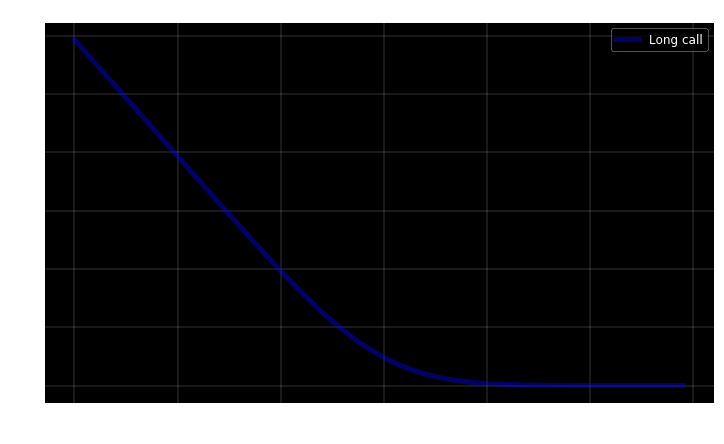

In [40]:
BlackScholesPutTaylor(170, 170, 0.005, 0.06, 0.4, 0.)

In [27]:
BlackScholesCall(100, 100, 0.005, 0.06, 0.4, 0.)

,Parameters,Values
0,Price Put,1.614276
1,Delta Put,0.528571
2,Gamma Put,0.104861
3,Theta Put,-2.143709
4,Rho Put,20.497131
5,Vega,25.166592


In [50]:
BlackScholesPut(100, 100, 0.005, 0.06, 0.4, 0.)

,Parameters,Values
0,Price Put,1.414476
1,Delta Put,-0.471429
2,Gamma Put,0.104861
3,Theta Put,-1.631280
4,Rho Put,-19.422949
5,Vega,25.166592


In [51]:
# Import all relevant packages 
import numpy as np 
import matplotlib.pyplot as matplt
#import bqapi as bq
import pandas as pd
import ipywidgets as widgets
import numpy.random as npr
import bqplot.pyplot as plt
from ipywidgets import Layout, interact, HBox, VBox, FloatSlider, IntSlider, interactive, fixed, interact_manual, Text
from scipy.stats import norm
from IPython.display import display, HTML
from bqplot import OrdinalScale, LinearScale, Bars, Lines, Axis, Hist, Figure
%matplotlib inline

In [52]:
def call(strike, premium_call):
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of Long Call position: max(S-X,0) where we include the premium here
    
    payoff_long_call = [max(0, (i - strike)) - premium_call for i in price]
    payoff_short_call = [min(0, (strike - i)) + premium_call for i in price]
    
    fig, (ax1, ax2) = matplt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    matplt.style.use('dark_background')
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=3)
    ax1.plot(price, payoff_short_call, label = 'short Call',linewidth=3)
    
    # get line at origin
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_title('Long & Short Call Payoff',fontsize = 12, color = 'w')
    ax1.grid(True,linewidth=0.2)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    bbox_props1 = dict(boxstyle="Darrow,pad=0.1", fc="b", ec="b")
    bbox_props2 = dict(boxstyle="Darrow,pad=0.1", fc="g", ec="g")
    bbox_props3 = dict(boxstyle="Darrow,pad=0.1", fc="none", ec="y")
    ax1.text(strike - 3.5, -20, "Out of the Money (OTM)", ha="right", va="center", 
            size=12,
            bbox=bbox_props1)
    ax1.text(strike + 3, -20, "In the Money (ITM)", ha="left", va="center", color="w",
            size=12,
            bbox=bbox_props2)
    ax1.text(strike, -25, "ATM", ha="center", va="top", rotation=90,
            size=12,
            bbox=bbox_props3)
# define distribution 
    x = np.linspace(120,220,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x <=strike, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
def put(strike, premium_put): 
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of Long Put position: max(X-S,0) where we include the premium here

    # payoff_long_put = [max(0, (strike - i)) - premium for i in price]
    payoff_long_put = [max(0, (strike - i)) - premium_put for i in price]
    payoff_short_put = [min(0, (i - strike)) + premium_put for i in price]

    fig, (ax1, ax2) = matplt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    matplt.style.use('dark_background')
    ax1.plot(price, payoff_long_put, label = 'Long Put',linewidth=3)
    ax1.plot(price, payoff_short_put, label = 'short Put',linewidth=3)
    
    # get line at origin
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_title('Long & Short Put Payoff',fontsize = 12, color = 'w')
    ax1.grid(True,linewidth=0.2)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    bbox_props1 = dict(boxstyle="Darrow,pad=0.1", fc="b", ec="b")
    bbox_props2 = dict(boxstyle="Darrow,pad=0.1", fc="g", ec="g")
    bbox_props3 = dict(boxstyle="Darrow,pad=0.1", fc="none", ec="y")
    ax1.text(strike - 3, -20, "In the Money (ITM)", ha="right", va="center", 
            size=12,
            bbox=bbox_props1)
    ax1.text(strike + 3, -20, "Out of the Money (OTM)", ha="left", va="center", color="w",
            size=12,
            bbox=bbox_props2)
    ax1.text(strike, -25, "ATM", ha="center", va="top", rotation=90,
            size=12,
            bbox=bbox_props3)
# define distribution 
    x = np.linspace(120,220,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x >=strike, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
def butterfly(strike_call_itm, strike_call_otm, strike_atm, premium_itm, premium_otm, premium_atm):
    price = np.arange(110,230,1)
    # payoff for the long ITM call position (inlcude premium directly)
    payoff_itm_long = [max(- premium_itm, i - strike_call_itm - premium_itm) for i in price]
    # payoff for the long OTM call position
    payoff_otm_long = [max(- premium_otm, i-strike_call_otm-premium_otm) for i in price]
    # payoff for the 2 short ATM call position
    payoff_atm_short = [min(2*premium_atm, -2*(i-strike_atm-premium_atm)) for i in price]
    # payoff for Butterfly Spread Strategy
    payoff = np.sum([payoff_itm_long, payoff_otm_long, payoff_atm_short], axis=0)
     
    matplt.style.use('dark_background')
    fig, (ax1, ax2) = matplt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))

    ax1.plot(price, payoff_itm_long, label = 'Long ITM Call',linewidth=1)
    ax1.plot(price, payoff_otm_long, label = 'Long OTM Call',linewidth=1)
    ax1.plot(price, payoff_atm_short, label = 'Short 2 ATM Call',linewidth=1)
    ax1.plot(price, payoff, label = 'Long Butterfly',linewidth=5, linestyle='dashed',color="r")

    ax1.axhline(linewidth=2, color='b')

    ax1.axvline(x=strike_call_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_atm,linewidth=0.5, color='g')

    ax1.legend(fontsize = 8) #loc=3)
    ax1.set_xlabel('Price of underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Long Butterfly Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x <=strike_call_itm, color='r') 
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
def synthetic_forward(strike_atm, premium_call, premium_put): 
    price = np.arange(110,230,1) # the stock price at expiration date
    call_put_flag = -1
# payoff for the long call
    payoff_long_call = [max(0, (i - strike_atm))-premium_call for i in price]
# payoff for the short put
    payoff_short_put = [min(0, (i - strike_atm))-premium_put*call_put_flag for i in price]
# combined payoff
    payoff = np.sum([payoff_long_call, payoff_short_put], axis=0)
    
    matplt.style.use('dark_background')
    fig, (ax1, ax2) = matplt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
 
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)
    ax1.plot(price, payoff_short_put, label = 'Short put',linewidth=1)
    ax1.plot(price, payoff, label = 'Risk Reversal',linewidth=5, linestyle='dashed',color="r")
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Synthetic Forward Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)   
    ax1.axvline(x=strike_atm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = (x <= strike_atm) & (x >=strike_atm), color='r') 
    ax2.fill_between(x,y, where = (x >=strike_atm) & (x<=strike_atm), color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
def risk_reversal(strike_call_otm, strike_put_otm,premium_otm): 
    price = np.arange(110,230,1) # the stock price at expiration date
    call_put_flag = -1
# payoff for the long call
    payoff_long_call = [max(0, (i - strike_call_otm))-premium_otm for i in price]
# payoff for the short put
    payoff_short_put = [min(0, (i - strike_put_otm))-premium_otm*call_put_flag for i in price]
# combined payoff
    payoff = np.sum([payoff_long_call, payoff_short_put], axis=0)
    
    matplt.style.use('dark_background')
    fig, (ax1, ax2) = matplt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
 
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)
    ax1.plot(price, payoff_short_put, label = 'Short put',linewidth=1)
    ax1.plot(price, payoff, label = 'Synthetic Forward',linewidth=5, linestyle='dashed',color="r")
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Risk Reversal Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)   
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_put_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = (x <= strike_call_otm) & (x >=strike_put_otm), color='r') 
    ax2.fill_between(x,y, where = (x >=strike_put_otm) & (x<=strike_call_otm), color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
def covered_call(strike_call_otm, premium_otm, underlying):
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of short call position
    payoff_short_call = [min(0, - (i - strike_call_otm)) + premium_otm for i in price]
    # the payoff of long stock postion
    payoff_long_stock = [i - underlying for i in price]
    # the payoff of covered call
    payoff_covered_call = np.sum([payoff_short_call, payoff_long_stock], axis=0)
    
    max_profit = (strike_call_otm - underlying) + premium_otm
    
    fig, (ax1, ax2) = matplt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    matplt.style.use('dark_background')
    
    ax1.plot(price, payoff_short_call, label = 'Short Call', linewidth=1)
    ax1.plot(price, payoff_long_stock, label = 'Long Underlying', linewidth=1)
    ax1.plot(price, payoff_covered_call, label = 'Covered Call', color='r', linewidth=5, linestyle='dashed')

    ax1.axhline(y=max_profit, xmin=0.0, xmax=1.0, color='w',linewidth=0.5)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Covered Call Strategy Payoff at Expiration', fontsize = 12)
    ax1.grid(True,linewidth=0.2)
# define distribution 
    x = np.linspace(120,220,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
def protective_put(strike_put_otm, premium_otm, underlying):
    price = np.arange(110,230,1) # the stock price at expiration date
    # the payoff of short call position
    payoff_long_put = [max(0, (strike_put_otm - i)) - premium_otm for i in price]
    # the payoff of long stock postion
    payoff_long_stock = [i - underlying for i in price]
    # the payoff of covered call
    payoff_covered_call = np.sum([payoff_long_put, payoff_long_stock], axis=0)
    
    fig, (ax1, ax2) = matplt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    matplt.style.use('dark_background')
    
    ax1.plot(price, payoff_long_put, label = 'Short Call', linewidth=1)
    ax1.plot(price, payoff_long_stock, label = 'Long Underlying', linewidth=1)
    ax1.plot(price, payoff_covered_call, label = 'Covered Call', color='r', linewidth=5, linestyle='dashed')

    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Protective Put Strategy Payoff at Expiration', fontsize = 12)
    ax1.grid(True,linewidth=0.2)
# define distribution 
    x = np.linspace(120,220,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between(x,y, where = x <=strike_put_otm, color='r') 
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at Expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
def collar(strike_call_otm, strike_put_otm, premium_otm, underlying): 
    price = np.arange(110,230,1) # the stock price at expiration date
    call_put_flag = -1
# payoff for the long call
    payoff_short_call = [min(0, (strike_call_otm - i)) + premium_otm for i in price]
# payoff for the long put
    payoff_long_put = [max(0, (strike_put_otm - i)) - premium_otm for i in price]
# payoff underlying    
    payoff_long_stock = [i - underlying for i in price]
# combined payoff
    payoff = np.sum([payoff_short_call, payoff_long_put, payoff_long_stock], axis=0)
    
    matplt.style.use('dark_background')
    fig, (ax1, ax2) = matplt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    
    ax1.plot(price, payoff_short_call, label = 'Short Call',linewidth=1)
    ax1.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)
    ax1.plot(price, payoff_long_stock, label = 'Long Underlying',linewidth=1)
    ax1.plot(price, payoff, label = 'Collar',linewidth=5, linestyle='dashed',color='r')
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_ylabel('Payoff',fontsize = 12)
    ax1.set_title('Collar Payoff',fontsize = 12)
    ax1.grid(True,linewidth=0.2)   
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_put_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x >= strike_call_otm, color='r') 
    ax2.fill_between(x,y, where = x <=strike_put_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
def bull_spread(strike_call_itm, strike_call_otm, premium_itm, premium_otm):
    price = np.arange(110,230,1) 
    # long call with lower strike
    payoff_long_call = [max(0, (i - strike_call_itm)) - premium_itm for i in price]
    # short call with higher strike
    payoff_short_call = [min(premium_otm, -(i-strike_call_otm-premium_otm)) for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_call], axis=0)
    
    matplt.style.use('dark_background')
    fig, (ax1, ax2) = matplt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)   
    ax1.plot(price, payoff_short_call, label = 'Short Call',linewidth=1)
    ax1.plot(price, payoff, label = 'Bull Call Spread',linewidth=5, linestyle='dashed',color='r')
    
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_xlabel('Payoff',fontsize = 12)
    ax1.set_title('Bull Call Spread Payoff at Expiration',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)   
    ax1.axvline(x=strike_call_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x <= strike_call_itm, color='r') 
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
def bull_spread_put(strike_put_itm, strike_put_otm, premium_itm, premium_otm):
    price = np.arange(110,230,1) 
    call_put_flag = -1
    # short put with higher strike
    payoff_short_put = [min(0, (i - strike_put_itm)) + premium_itm for i in price]
    # long put with lower strike
    payoff_long_put = [max(0, (strike_put_otm - i)) - premium_otm for i in price]

    payoff = np.sum([payoff_long_put, payoff_short_put], axis=0)
    
    matplt.style.use('dark_background')
    fig, (ax1, ax2) = matplt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    ax1.plot(price, payoff_long_put, label = 'Long Put',linewidth=1)   
    ax1.plot(price, payoff_short_put, label = 'Short Put',linewidth=1)
    ax1.plot(price, payoff, label = 'Bull Put Spread',linewidth=5, linestyle='dashed',color='r',)
    
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_xlabel('Payoff',fontsize = 12)
    ax1.set_title('Bull Put Spread Payoff at Expiration',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)   
    ax1.axvline(x=strike_put_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_put_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x >= strike_put_itm, color='r') 
    ax2.fill_between(x,y, where = x <=strike_put_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)    

def bear_spread_call(strike_call_itm, strike_call_otm, premium_itm, premium_otm):
    price = np.arange(110,230,1) 
    # short call with lower strike
    payoff_short_call = [min(premium_itm, - (i- strike_call_itm - premium_itm)) for i in price]
    # long call with higher strike
    payoff_long_call = [max(0, (i - strike_call_otm)) - premium_otm for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_call], axis=0)
    
    matplt.style.use('dark_background')
    fig, (ax1, ax2) = matplt.subplots(ncols=2, sharex=False, sharey=False,figsize=(15,5))
    ax1.plot(price, payoff_long_call, label = 'Long Call',linewidth=1)   
    ax1.plot(price, payoff_short_call, label = 'Short Call',linewidth=1)
    ax1.plot(price, payoff, label = 'Bear Call Spread',linewidth=5, linestyle='dashed',color='r')
    
    ax1.legend(fontsize = 12)
    ax1.set_xlabel('Price of Underlying at Expiry',fontsize = 12)
    ax1.set_xlabel('Payoff',fontsize = 12)
    ax1.set_title('Bear Call Spread Payoff at Expiration',fontsize = 12)
    ax1.grid(True,linewidth=0.2)
    ax1.axhline(linewidth=2, color='b')
    ax1.legend(fontsize = 12)   
    ax1.axvline(x=strike_call_itm,linewidth=0.5, color='g')
    ax1.axvline(x=strike_call_otm,linewidth=0.5, color='g')
# define distribution 
    x = np.linspace(110,230,1000)
    y = norm.pdf(x, loc=170, scale=15)    # pass the mean and standard deviation as loc and scale
    ax2.plot(x,y)
    ax2.fill_between (x,y, where = x <= strike_call_itm, color='r') 
    ax2.fill_between(x,y, where = x >=strike_call_otm, color='r')
    ax2.set_title('Return Distribution associated with the underlying',fontsize = 12, color = 'w')
    ax2.set_xlabel('Price of Underlying at expiry', fontsize = 12)
    ax2.set_ylabel('Probability',fontsize = 12)
    
def straddle(strike_atm, premium_atm):
    price = np.arange(110,230,1)
    # payoff for the long call
    payoff_long_call = [max(-premium_atm, i-strike_atm-premium_atm) for i in price]
    # payoff for the long put
    payoff_long_put = [max(-premium_atm, strike_atm-i-premium_atm) for i in price]
    payoff = np.sum([payoff_long_call, payoff_long_put], axis=0)
    matplt.figure(figsize=(12,7))
    matplt.plot(price, payoff_long_call, label = 'Long Call')
    matplt.plot(price, payoff_long_put, label = 'long put')
    matplt.axhline(linewidth=2, color='b')
    matplt.plot(price, payoff, label = 'Long Straddle',linewidth=6, linestyle='dashed',color='r')
    matplt.legend(fontsize = 12)
    matplt.xlabel('Price of Underlying at Expiry',fontsize = 12)
    matplt.ylabel('Payoff',fontsize = 12)
    matplt.title('Long Straddle Payoff',fontsize = 12)
    matplt.grid(True,linewidth=0.2)

def strangle(strike_call_otm, strike_put_otm, premium_call, premium_put):
    price = np.arange(110,230,1)
    # payoff for the long call
    payoff_long_call = [max(-premium_put, i-strike_call_otm-premium_call) for i in price]
    # payoff for the long put
    payoff_long_put = [max(-premium_call, strike_put_otm-i-premium_put) for i in price]
    payoff = np.sum([payoff_long_call, payoff_long_put], axis=0)
    matplt.figure(figsize=(12,7))
    matplt.plot(price, payoff_long_call, label = 'Long Call')
    matplt.plot(price, payoff_long_put, label = 'long put')
    matplt.axhline(linewidth=2, color='b')
    matplt.plot(price, payoff, label = 'Long Straddle',linewidth=6, linestyle='dashed',color='r')
    matplt.legend(fontsize = 12)
    matplt.xlabel('Price of Underlying at Expiry',fontsize = 12)
    matplt.ylabel('Payoff',fontsize = 12)
    matplt.title('Long Straddle Payoff',fontsize = 12)
    matplt.grid(True,linewidth=0.2)
    


In [56]:
def option_type(*args):
    """
    ################################
    ## option_type(strategy_name) ##
    ################################
    
    Supported strategies: 
    call, 
    put,
    synthetic_forward,
    risk_reversal, 
    collar (short risk_reversal and long underlying), 
    butterfly, 
    protective_put (long put and long underlying),
    covered_call (long underlying and short call),
    bull_spread (two calls),
    bull_spread_put (two puts),
    bear_spread (two puts),
    bear_spread_call (two calls),
    straddle,
    strangle,
    BSM Call Pricer,
    BSM Put Pricer,
    BSM Delta Gamma Approximation Call':BlackScholesCallTaylor,
    BSM Delta Gamma Approximation Put
    
    tbc?
    """
    strike = 170
    stock  = 170
    for x in args:
        return(interact(x,
                # determine strikes 
                strike = widgets.FloatSlider(value = strike,
                                                   min = 160.0,
                                                   max = 185.0,
                                                   step = 1.0,
                                                   description='Strike'),
                strike_atm = widgets.FloatSlider(value = strike,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0,
                                                   description='ATM Strike'),
                strike_call_otm = widgets.FloatSlider(value = strike + 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0,
                                                   description='Call Strike OTM'),
                strike_put_otm = widgets.FloatSlider(value = strike - 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0,
                                                   description='Put Strike OTM'),
                strike_put_itm = widgets.FloatSlider(value = strike + 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0,
                                                   description='Put Strike ITM'),
                strike_call_itm = widgets.FloatSlider(value = strike - 25,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0,
                                                   description='Call Strike ITM'),
                underlying = widgets.FloatSlider(value = strike,
                                                   min = 110.0,
                                                   max = 230.0,
                                                   step = 5.0,
                                                   description='Underlying'),
                        
                # all premiums needed         
                premium_call = widgets.FloatSlider(value = 8,
                                                   min = 1,
                                                   max = 30,
                                                   step = 0.5,
                                                   description='Call Premium'),
                premium_put = widgets.FloatSlider(value = 8,
                                                   min = 1,
                                                   max = 30,
                                                   step = 0.5,
                                                   description='Put Premium'),
                premium_itm = widgets.FloatSlider(value = 25,
                                                   min = 1,
                                                   max = 50,
                                                   step = 0.5,
                                                   description='ITM Premium'),
                premium_atm = widgets.FloatSlider(value = 10,
                                                   min = 1,
                                                   max = 25,
                                                   step = 0.5,
                                                   description='ATM Premium'),
                premium_otm = widgets.FloatSlider(value = 8.5,
                                                   min = 1, 
                                                   max = 20,
                                                   step = 0.5,
                                                   description='OTM Premium'),
                stock = widgets.FloatSlider(value = stock,
                                                   min = 160.0,
                                                   max = 185.0,
                                                   step = 1.0,
                                                   description='Stock Price'),
                strike_BSM = widgets.FloatSlider(value = strike,
                                                   min = 140.0,
                                                   max = 195.0,
                                                   step = 1.0,
                                                   description='Strike'),
                        
                sigma = widgets.FloatSlider(value = 0.06,
                                                   min = 0.001,
                                                   max = 0.25,
                                                   step = 0.01,
                                                   description='Volatility'),
                                        
                risk_free_rate = widgets.FloatSlider(value = 0.01,
                                                   min = 0.0,
                                                   max = 0.2,
                                                   step = 0.01,
                                                   description='Risk Free Rate'),
                        
                time = widgets.FloatSlider(value = 0.4,
                                                   min = 0.001,
                                                   max = 2,
                                                   step = 0.01,
                                                   description='Time'),
                dividend_yield = widgets.FloatSlider(value = 0.01,
                                                   min = 0.0,
                                                   max = 0.2,
                                                   step = 0.01,
                                                   description='Dividend Yield')))

In [54]:
def OptionStrategies():
    option_strats = {'':'',
                     'Call':call, 
                     'Put': put,
                     'Synthetic Forward': synthetic_forward,
                     'Risk reversal': risk_reversal, 
                     'Collar': collar, 
                     'Butterfly': butterfly, 
                     'Protective Put': protective_put,
                     'Covered Call': covered_call,
                     'Bull Spread': bull_spread,
                     'Bull Put Spread': bull_spread_put,
                     'Bear Call Spread': bear_spread_call,
                     'Straddle': straddle,
                     'Strangle': strangle,
                     'BSM Call Pricer':BlackScholesCall,
                     'BSM Put Pricer':BlackScholesPut,
                     'BSM Delta Gamma Approximation Call':BlackScholesCallTaylor,
                     'BSM Delta Gamma Approximation Put':BlackScholesPutTaylor,
                    }

    out = widgets.Output()

    def wrapper(click=None):
        strat = option_strats[dropdown.value]

        out.clear_output(wait=True)

        with out:        
            display(option_type(strat))

    dropdown = widgets.Dropdown(options=option_strats.keys(), description='Strategy')
    dropdown.observe(wrapper, 'value')
    display(dropdown, out)


In [55]:
OptionStrategies()

Dropdown(description='Strategy', options=('', 'Call', 'Put', 'Synthetic Forward', 'Risk reversal', 'Collar', '…

Output()

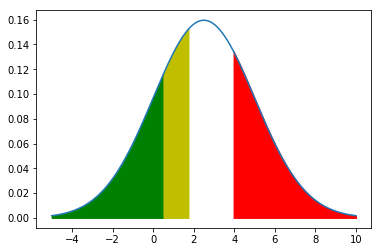

In [1]:
import math
import math
from decimal import Decimal
import numpy as np
import pandas as pd 

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

from scipy.stats import norm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.api as sm

from IPython.display import HTML, display


x = np.linspace(-5,10,1000)
y = norm.pdf(x, loc=2.5, scale=2.5)    # pass the mean and standard deviation as loc and scale
plt.plot(x,y)
plt.fill_between(x,y, where = x >=3.95, color='r')
plt.fill_between(x,y, where = x <=0.5, color='g')
plt.fill_between(x,y, where = (x<=1.75) & (x>=0.5), color='y')
plt.show()